# Methods definition

In [2]:
from graph_utils import (
    dot_to_nx,
    visualize_nx_graph,
    save_nx_graph,
    nx_to_pyg,
    update_nx_graph
)

In [3]:
from visualization import (
    visualize_edge_features ,
    visualize_node_features
)

# Import workflow

## Create NetworkX graph

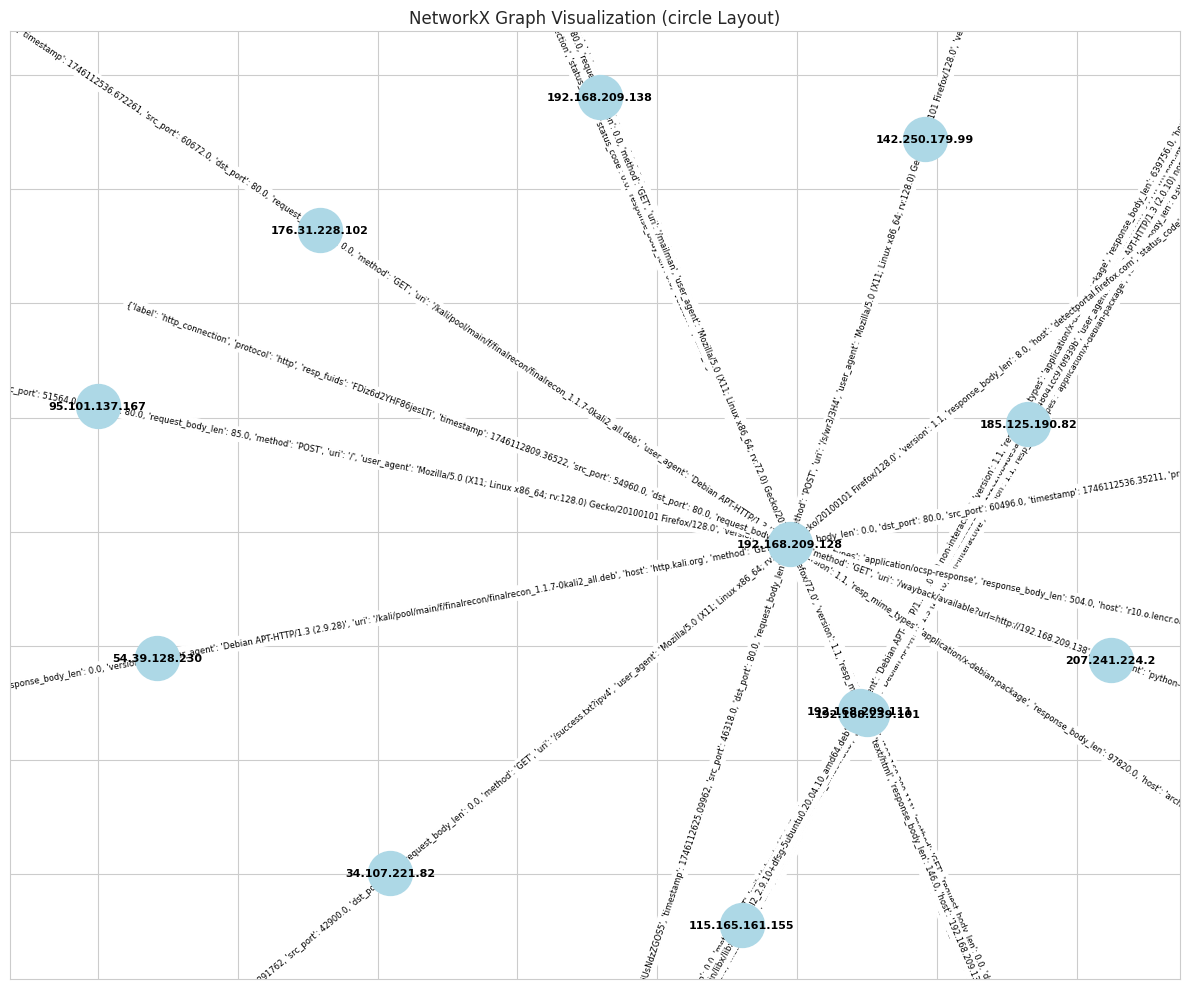

In [4]:
dot_file_path = "samples/sample_graph.dot"
layout_algorithm = "circle"
nx_graph = dot_to_nx(dot_file_path)

# Visualize the graph
visualize_nx_graph(nx_graph, layout_algorithm)

## Convert to PYG Graph

In [5]:
data = nx_to_pyg(nx_graph, node_scaling='standard', edge_scaling='standard')
print("\nPyTorch Geometric Data Object:")
print(data)

Sorted node attribute keys: ['activity_score', 'degree', 'in_degree', 'out_degree', 'total_connections']
Node Features (x) after initial standard scaling: tensor([[ 1.1130,  0.1744,  0.8979, -0.3022,  0.1744],
        [ 1.1130,  0.7701,  2.0513, -0.2984,  0.7701],
        [-1.0251, -0.5725, -0.5569, -0.3022, -0.5725],
        [ 0.8201, -0.5684, -0.5490, -0.3022, -0.5684],
        [ 1.1130,  0.7701,  2.0513, -0.2984,  0.7701],
        [-1.5231, -0.5729, -0.5578, -0.3022, -0.5729],
        [-0.4393, -0.5718, -0.5557, -0.3022, -0.5718],
        [-0.2929, -0.5716, -0.5553, -0.3022, -0.5716],
        [ 0.2929, -0.5705, -0.5532, -0.3022, -0.5705],
        [-1.0251, -0.5725, -0.5569, -0.3022, -0.5725],
        [-1.2595, -0.5727, -0.5574, -0.3022, -0.5727],
        [ 1.1130,  2.8582, -0.5582,  3.3166,  2.8582]])
Sorted edge attribute keys: ['dst_port', 'host', 'label', 'method', 'protocol', 'request_body_len', 'resp_fuids', 'resp_mime_types', 'response_body_len', 'src_port', 'status_code', 'st

In [6]:
# Add this code to explore the Data object:
print("\n--- Node Features (x) ---")
print(data.x)
print(f"Shape of node features: {data.x.shape}")


--- Node Features (x) ---
tensor([[ 1.1130,  0.1744,  0.8979, -0.3022,  0.1744],
        [ 1.1130,  0.7701,  2.0513, -0.2984,  0.7701],
        [-1.0251, -0.5725, -0.5569, -0.3022, -0.5725],
        [ 0.8201, -0.5684, -0.5490, -0.3022, -0.5684],
        [ 1.1130,  0.7701,  2.0513, -0.2984,  0.7701],
        [-1.5231, -0.5729, -0.5578, -0.3022, -0.5729],
        [-0.4393, -0.5718, -0.5557, -0.3022, -0.5718],
        [-0.2929, -0.5716, -0.5553, -0.3022, -0.5716],
        [ 0.2929, -0.5705, -0.5532, -0.3022, -0.5705],
        [-1.0251, -0.5725, -0.5569, -0.3022, -0.5725],
        [-1.2595, -0.5727, -0.5574, -0.3022, -0.5727],
        [ 1.1130,  2.8582, -0.5582,  3.3166,  2.8582]])
Shape of node features: torch.Size([12, 5])


In [7]:
print("\n--- Edge Indices (edge_index) ---")
print(data.edge_index)
print(f"Shape of edge indices: {data.edge_index.shape}")


--- Edge Indices (edge_index) ---
tensor([[ 1,  1,  1,  ..., 11, 11, 11],
        [ 8,  8,  8,  ...,  0,  0,  0]])
Shape of edge indices: torch.Size([2, 14384])


In [8]:
print("\n--- Edge Attributes (edge_attr) ---")
if data.edge_attr is not None:
    print(data.edge_attr)
    print(f"Shape of edge attributes: {data.edge_attr.shape}")
else:
    print("No edge attributes.")


--- Edge Attributes (edge_attr) ---
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0674],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0674],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0674],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0674],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0674],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0674]])
Shape of edge attributes: torch.Size([14384, 16])


# Feature visualization

Grafo con 12 nodi e 5 features:
Nomi features: activity_score, degree, in_degree, out_degree, total_connections

Statistiche features:
- activity_score: {'name': 'activity_score', 'unique': 8, 'mean': np.float32(-9.934108e-09), 'std': np.float32(0.99999994), 'min': np.float32(-1.523057), 'max': np.float32(1.1130031)}
- degree: {'name': 'degree', 'unique': 10, 'mean': np.float32(0.0), 'std': np.float32(1.0), 'min': np.float32(-0.5728879), 'max': np.float32(2.8582478)}
- in_degree: {'name': 'in_degree', 'unique': 10, 'mean': np.float32(0.0), 'std': np.float32(0.9999999), 'min': np.float32(-0.5581943), 'max': np.float32(2.0512643)}
- out_degree: {'name': 'out_degree', 'unique': 3, 'mean': np.float32(1.9868216e-08), 'std': np.float32(1.0), 'min': np.float32(-0.30220705), 'max': np.float32(3.3166215)}
- total_connections: {'name': 'total_connections', 'unique': 10, 'mean': np.float32(0.0), 'std': np.float32(1.0), 'min': np.float32(-0.5728879), 'max': np.float32(2.8582478)}


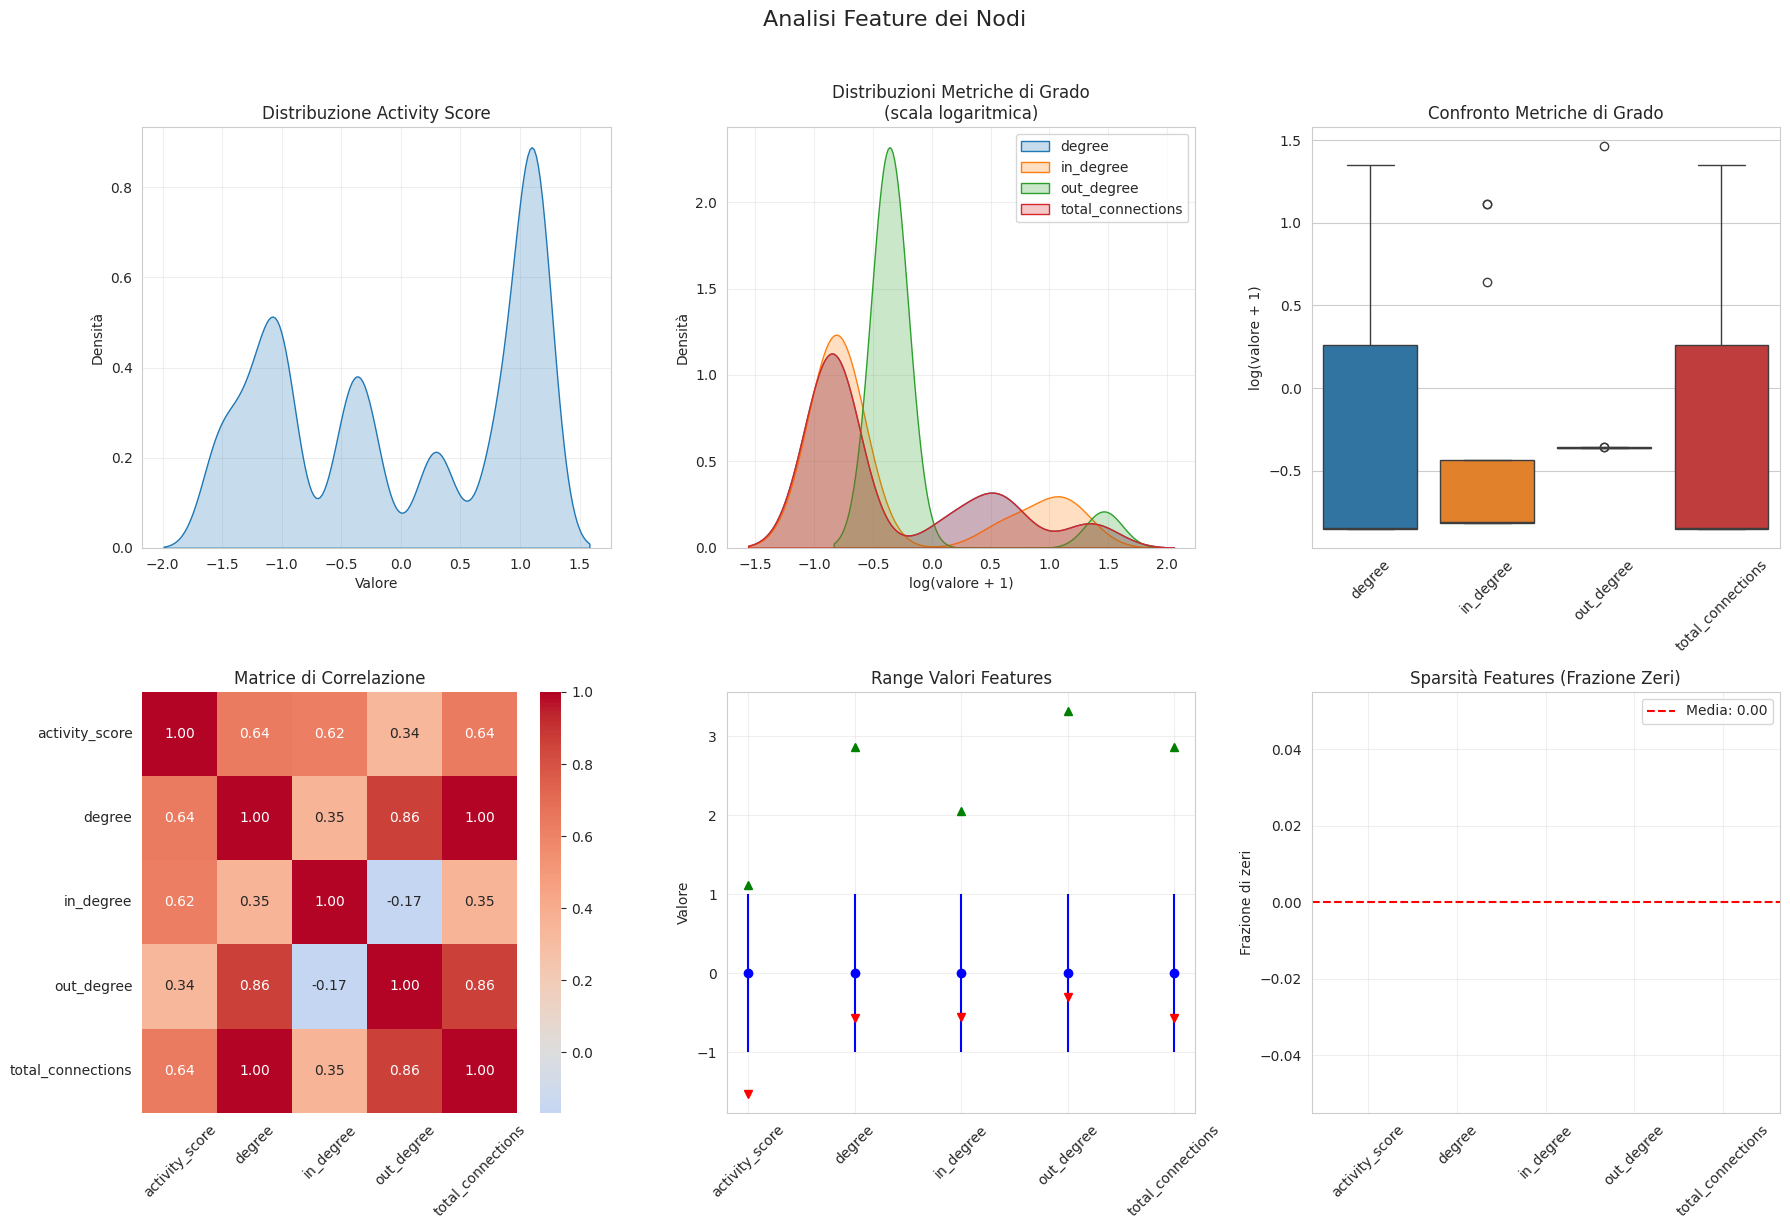


Analisi aggiuntiva:
- Le metriche di grado sono visualizzate in scala logaritmica
- Correlazione massima tra feature diverse: 1.00
- Correlazioni tra activity_score e metriche di grado:
  degree: 0.64
  in_degree: 0.62
  out_degree: 0.34
  total_connections: 0.64


In [9]:
feature_names = ['activity_score', 'degree', 'in_degree', 'out_degree', 'total_connections']
visualize_node_features(data, feature_names= feature_names)


# Import incremental graphs

In [5]:
# Load the initial graph
initial_graph = dot_to_nx("samples/sample_graph_encoded.dot")
data = nx_to_pyg(initial_graph, node_scaling='none', edge_scaling='none')

Sorted node attribute keys: ['activity_score', 'degree', 'in_degree', 'out_degree', 'total_connections']
No node feature scaling applied.
Sorted edge attribute keys: ['dst_port_type', 'host_length', 'http_version', 'method_DELETE', 'method_GET', 'method_HEAD', 'method_OPTIONS', 'method_POST', 'method_PUT', 'method_UNKNOWN', 'protocol_DNS', 'protocol_FTP', 'protocol_HTTP', 'protocol_HTTPS', 'protocol_SSH', 'protocol_UNKNOWN', 'request_body_len', 'response_body_len', 'src_port_type', 'status_client_error', 'status_redirection', 'status_server_error', 'status_success', 'statusmsg_Accepted', 'statusmsg_Created', 'statusmsg_Forbidden', 'statusmsg_Not_Found', 'statusmsg_OK', 'statusmsg_Other', 'statusmsg_Server_Error', 'timestamp_cos', 'timestamp_sin', 'ua_Bot', 'ua_Chrome', 'ua_Edge', 'ua_Firefox', 'ua_Opera', 'ua_Safari', 'ua_Unknown', 'uri_length']
No edge feature scaling applied.


Grafo con 10 nodi e 5 features:
Nomi features: activity_score, degree, in_degree, out_degree, total_connections

Statistiche features:
- activity_score: {'name': 'activity_score', 'unique': 9, 'mean': np.float32(0.491), 'std': np.float32(0.22858042), 'min': np.float32(0.1), 'max': np.float32(0.86)}
- degree: {'name': 'degree', 'unique': 9, 'mean': np.float32(7.6), 'std': np.float32(5.0635953), 'min': np.float32(1.0), 'max': np.float32(19.0)}
- in_degree: {'name': 'in_degree', 'unique': 7, 'mean': np.float32(3.8), 'std': np.float32(3.8418746), 'min': np.float32(0.0), 'max': np.float32(12.0)}
- out_degree: {'name': 'out_degree', 'unique': 4, 'mean': np.float32(3.8), 'std': np.float32(6.3055534), 'min': np.float32(0.0), 'max': np.float32(19.0)}
- total_connections: {'name': 'total_connections', 'unique': 9, 'mean': np.float32(7.6), 'std': np.float32(5.0635953), 'min': np.float32(1.0), 'max': np.float32(19.0)}


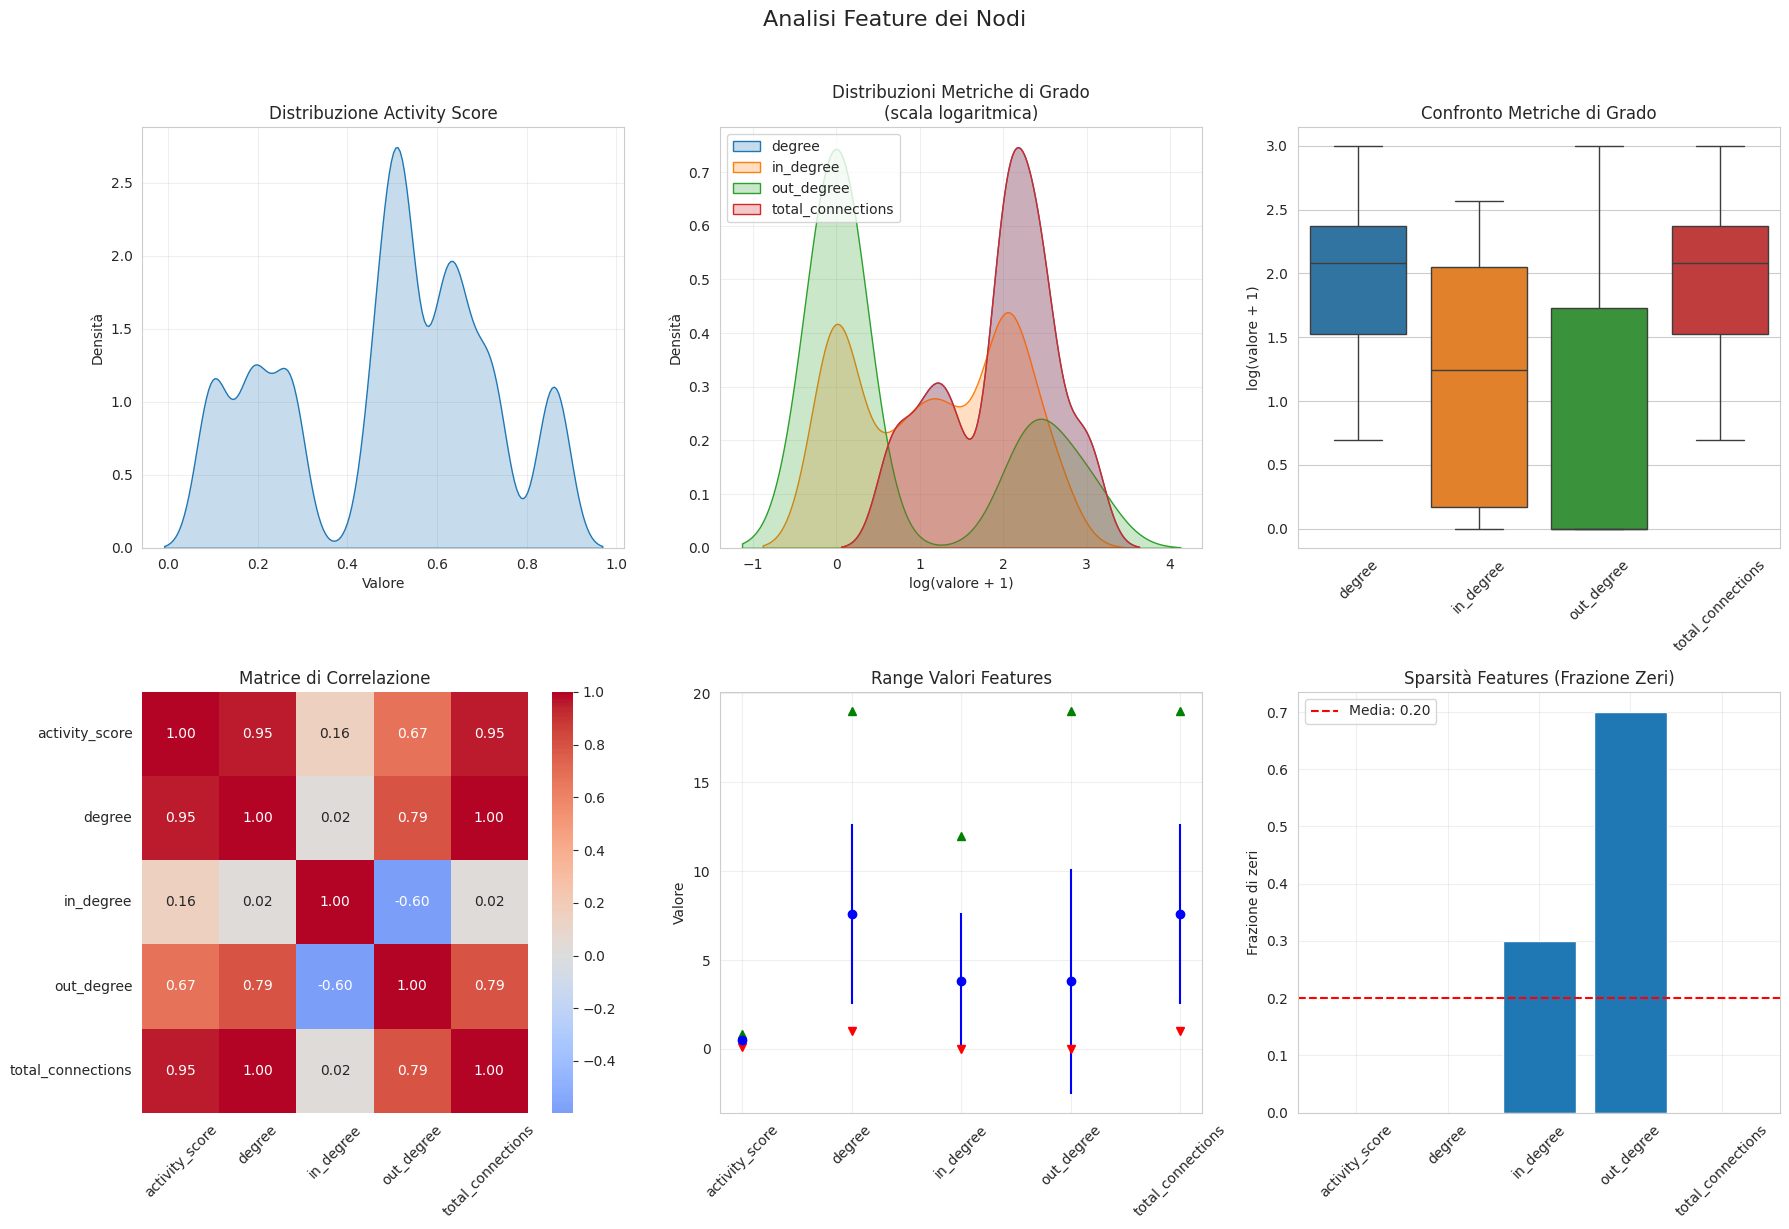


Analisi aggiuntiva:
- Le metriche di grado sono visualizzate in scala logaritmica
- Correlazione massima tra feature diverse: 1.00
- Correlazioni tra activity_score e metriche di grado:
  degree: 0.95
  in_degree: 0.16
  out_degree: 0.67
  total_connections: 0.95


In [6]:
feature_names = ['activity_score', 'degree', 'in_degree', 'out_degree', 'total_connections']
visualize_node_features(data, feature_names= feature_names)

Grafo con 38 archi e 40 edge features:

Statistiche edge features:
- dst_port_type: {'name': 'dst_port_type', 'unique': 1, 'mean': np.float32(0.0), 'std': np.float32(0.0), 'min': np.float32(0.0), 'max': np.float32(0.0)}
- host_length: {'name': 'host_length', 'unique': 2, 'mean': np.float32(0.016052628), 'std': np.float32(0.0048879404), 'min': np.float32(0.01), 'max': np.float32(0.02)}
- http_version: {'name': 'http_version', 'unique': 1, 'mean': np.float32(1.0999998), 'std': np.float32(2.3841858e-07), 'min': np.float32(1.1), 'max': np.float32(1.1)}
- method_DELETE: {'name': 'method_DELETE', 'unique': 1, 'mean': np.float32(0.0), 'std': np.float32(0.0), 'min': np.float32(0.0), 'max': np.float32(0.0)}
- method_GET: {'name': 'method_GET', 'unique': 2, 'mean': np.float32(0.65789473), 'std': np.float32(0.47441462), 'min': np.float32(0.0), 'max': np.float32(1.0)}
- ua_Firefox: {'name': 'ua_Firefox', 'unique': 2, 'mean': np.float32(0.36842105), 'std': np.float32(0.4823763), 'min': np.float32(0

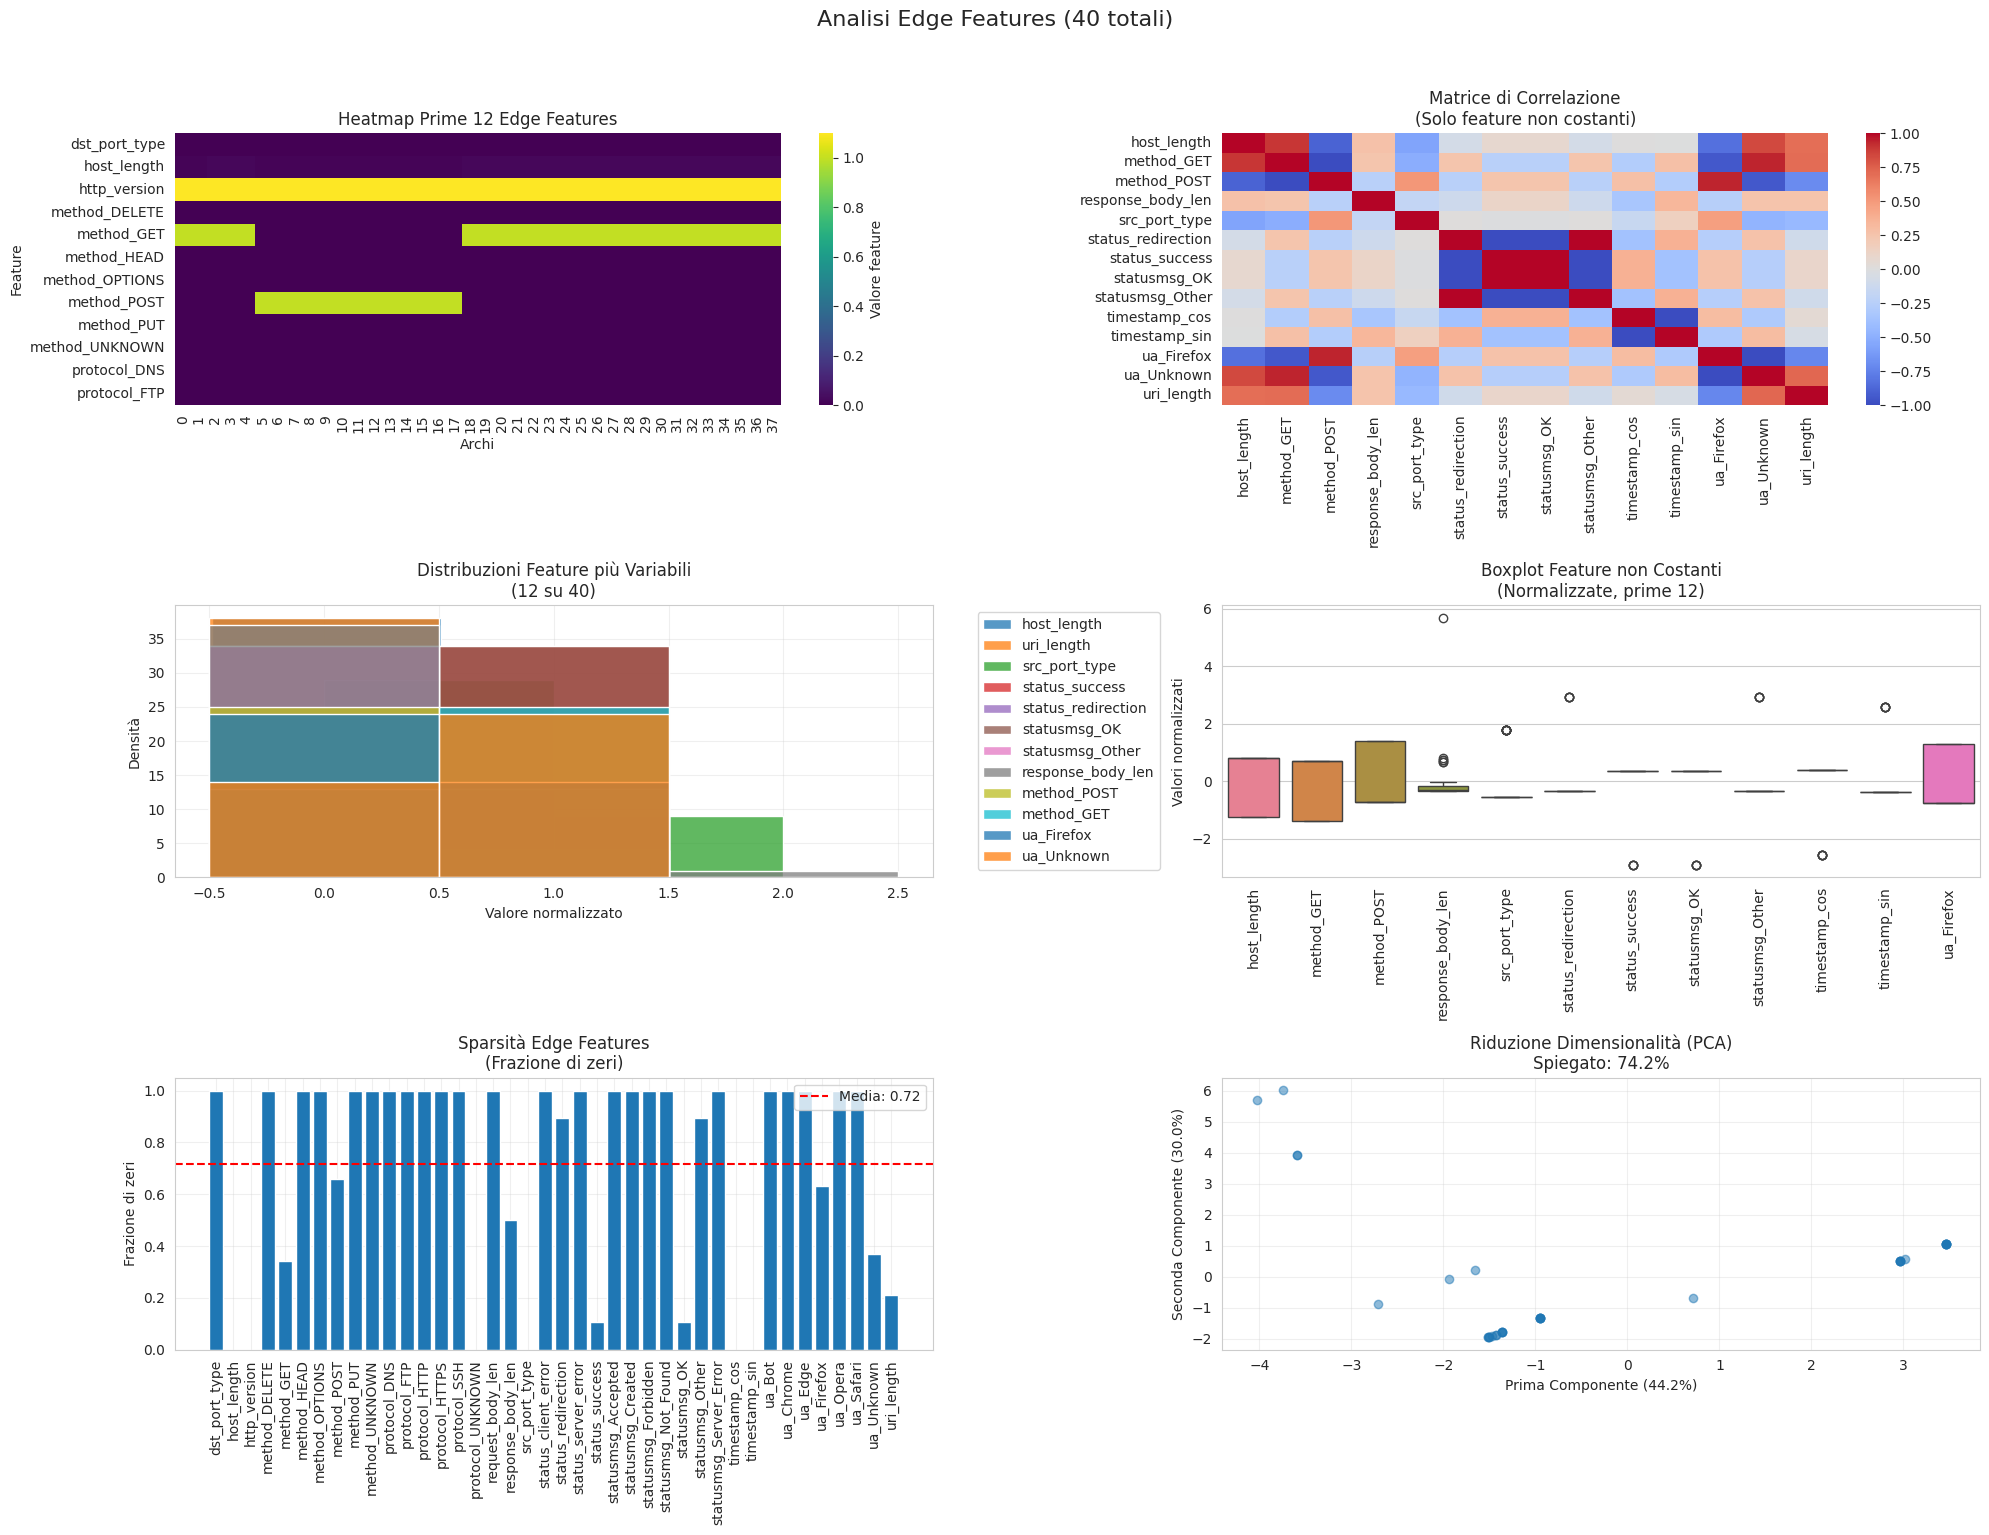


Analisi aggiuntiva:
- 26 feature sono costanti
- Massima correlazione tra feature diverse: 1.00
- Feature più correlate: method_GET e method_POST (1.00)


In [7]:
edge_features_name = ['dst_port_type', 'host_length', 'http_version', 'method_DELETE', 'method_GET', 'method_HEAD', 'method_OPTIONS', 'method_POST', 'method_PUT', 'method_UNKNOWN', 'protocol_DNS', 'protocol_FTP', 'protocol_HTTP', 'protocol_HTTPS', 'protocol_SSH', 'protocol_UNKNOWN', 'request_body_len', 'response_body_len', 'src_port_type', 'status_client_error', 'status_redirection', 'status_server_error', 'status_success', 'statusmsg_Accepted', 'statusmsg_Created', 'statusmsg_Forbidden', 'statusmsg_Not_Found', 'statusmsg_OK', 'statusmsg_Other', 'statusmsg_Server_Error', 'timestamp_cos', 'timestamp_sin', 'ua_Bot', 'ua_Chrome', 'ua_Edge', 'ua_Firefox', 'ua_Opera', 'ua_Safari', 'ua_Unknown', 'uri_length']
visualize_edge_features(data, edge_features_name)

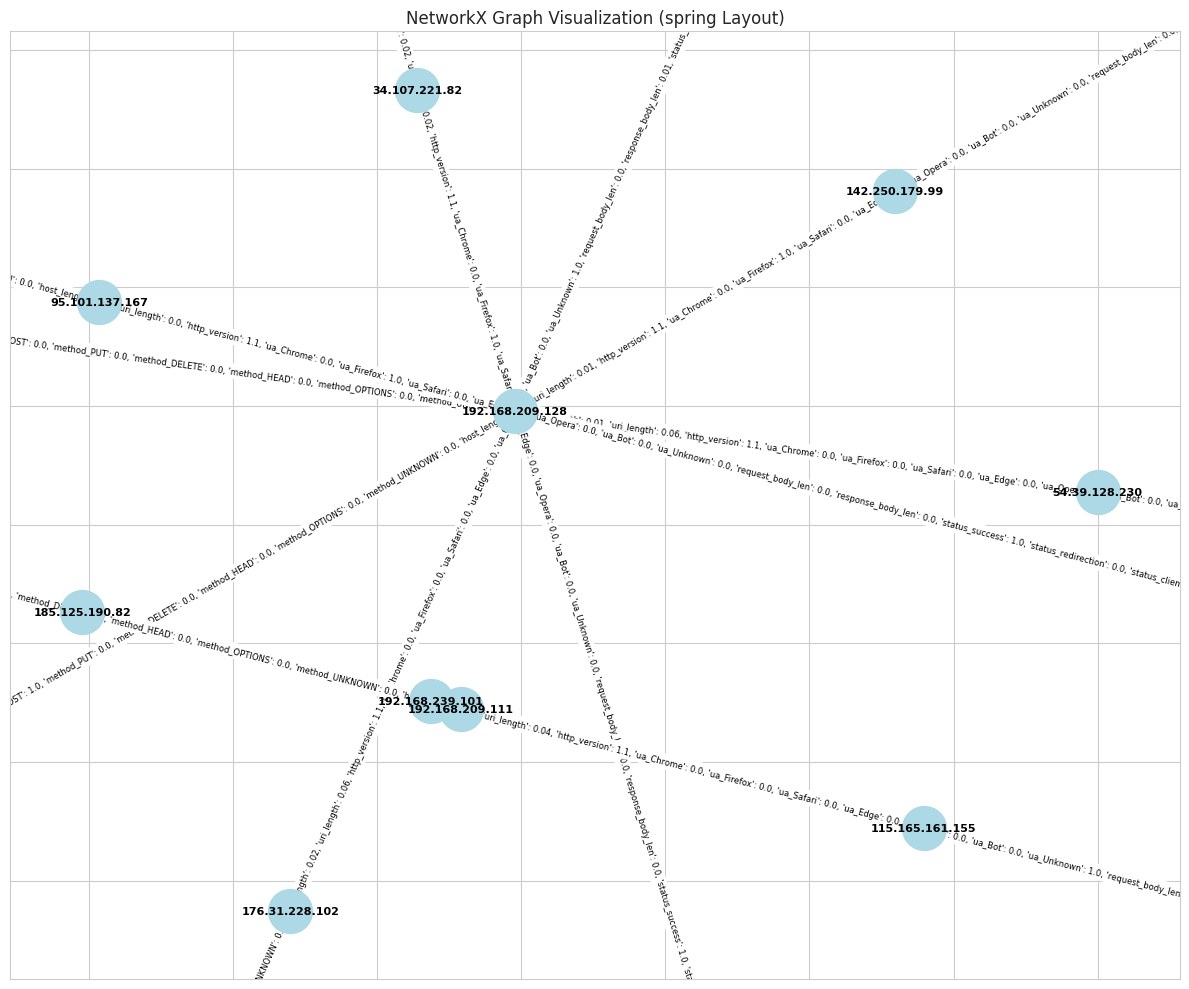

In [8]:
visualize_nx_graph(initial_graph)

In [9]:
 # Update the graph
updated_graph = update_nx_graph(initial_graph, "samples/update_encoded_1.dot")
data = nx_to_pyg(updated_graph, node_scaling='none', edge_scaling='none')

Updated node: 192.168.209.128
Updated node: 54.39.128.230
Updated node: 176.31.228.102
Updated node: 95.101.137.167
Updated node: 142.250.179.99
Updated node: 34.107.221.82
Updated node: 192.168.209.111
Updated node: 185.125.190.82
Updated node: 192.168.239.101
Updated node: 115.165.161.155
Added edge: 192.168.209.128 -> 54.39.128.230, key=0
Added edge: 192.168.209.128 -> 54.39.128.230, key=1
Added edge: 192.168.209.128 -> 176.31.228.102, key=0
Added edge: 192.168.209.128 -> 176.31.228.102, key=1
Added edge: 192.168.209.128 -> 176.31.228.102, key=2
Added edge: 192.168.209.128 -> 95.101.137.167, key=0
Added edge: 192.168.209.128 -> 95.101.137.167, key=1
Added edge: 192.168.209.128 -> 95.101.137.167, key=2
Added edge: 192.168.209.128 -> 95.101.137.167, key=3
Added edge: 192.168.209.128 -> 95.101.137.167, key=4
Added edge: 192.168.209.128 -> 95.101.137.167, key=5
Added edge: 192.168.209.128 -> 95.101.137.167, key=6
Added edge: 192.168.209.128 -> 142.250.179.99, key=0
Added edge: 192.168.2

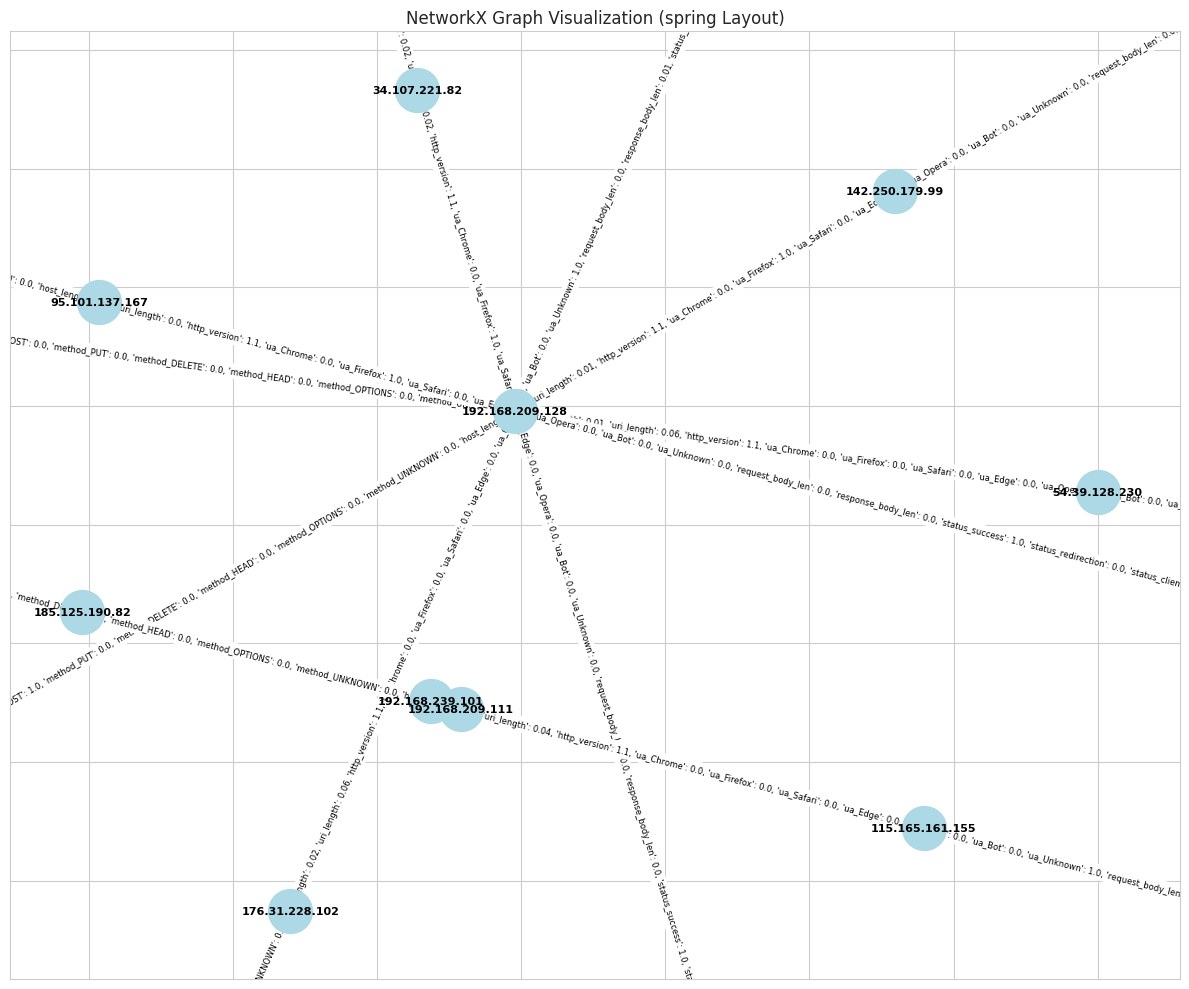

In [10]:
visualize_nx_graph(updated_graph)

Grafo con 10 nodi e 5 features:
Nomi features: activity_score, degree, in_degree, out_degree, total_connections

Statistiche features:
- activity_score: {'name': 'activity_score', 'unique': 9, 'mean': np.float32(0.491), 'std': np.float32(0.22858042), 'min': np.float32(0.1), 'max': np.float32(0.86)}
- degree: {'name': 'degree', 'unique': 9, 'mean': np.float32(7.6), 'std': np.float32(5.0635953), 'min': np.float32(1.0), 'max': np.float32(19.0)}
- in_degree: {'name': 'in_degree', 'unique': 7, 'mean': np.float32(3.8), 'std': np.float32(3.8418746), 'min': np.float32(0.0), 'max': np.float32(12.0)}
- out_degree: {'name': 'out_degree', 'unique': 4, 'mean': np.float32(3.8), 'std': np.float32(6.3055534), 'min': np.float32(0.0), 'max': np.float32(19.0)}
- total_connections: {'name': 'total_connections', 'unique': 9, 'mean': np.float32(7.6), 'std': np.float32(5.0635953), 'min': np.float32(1.0), 'max': np.float32(19.0)}


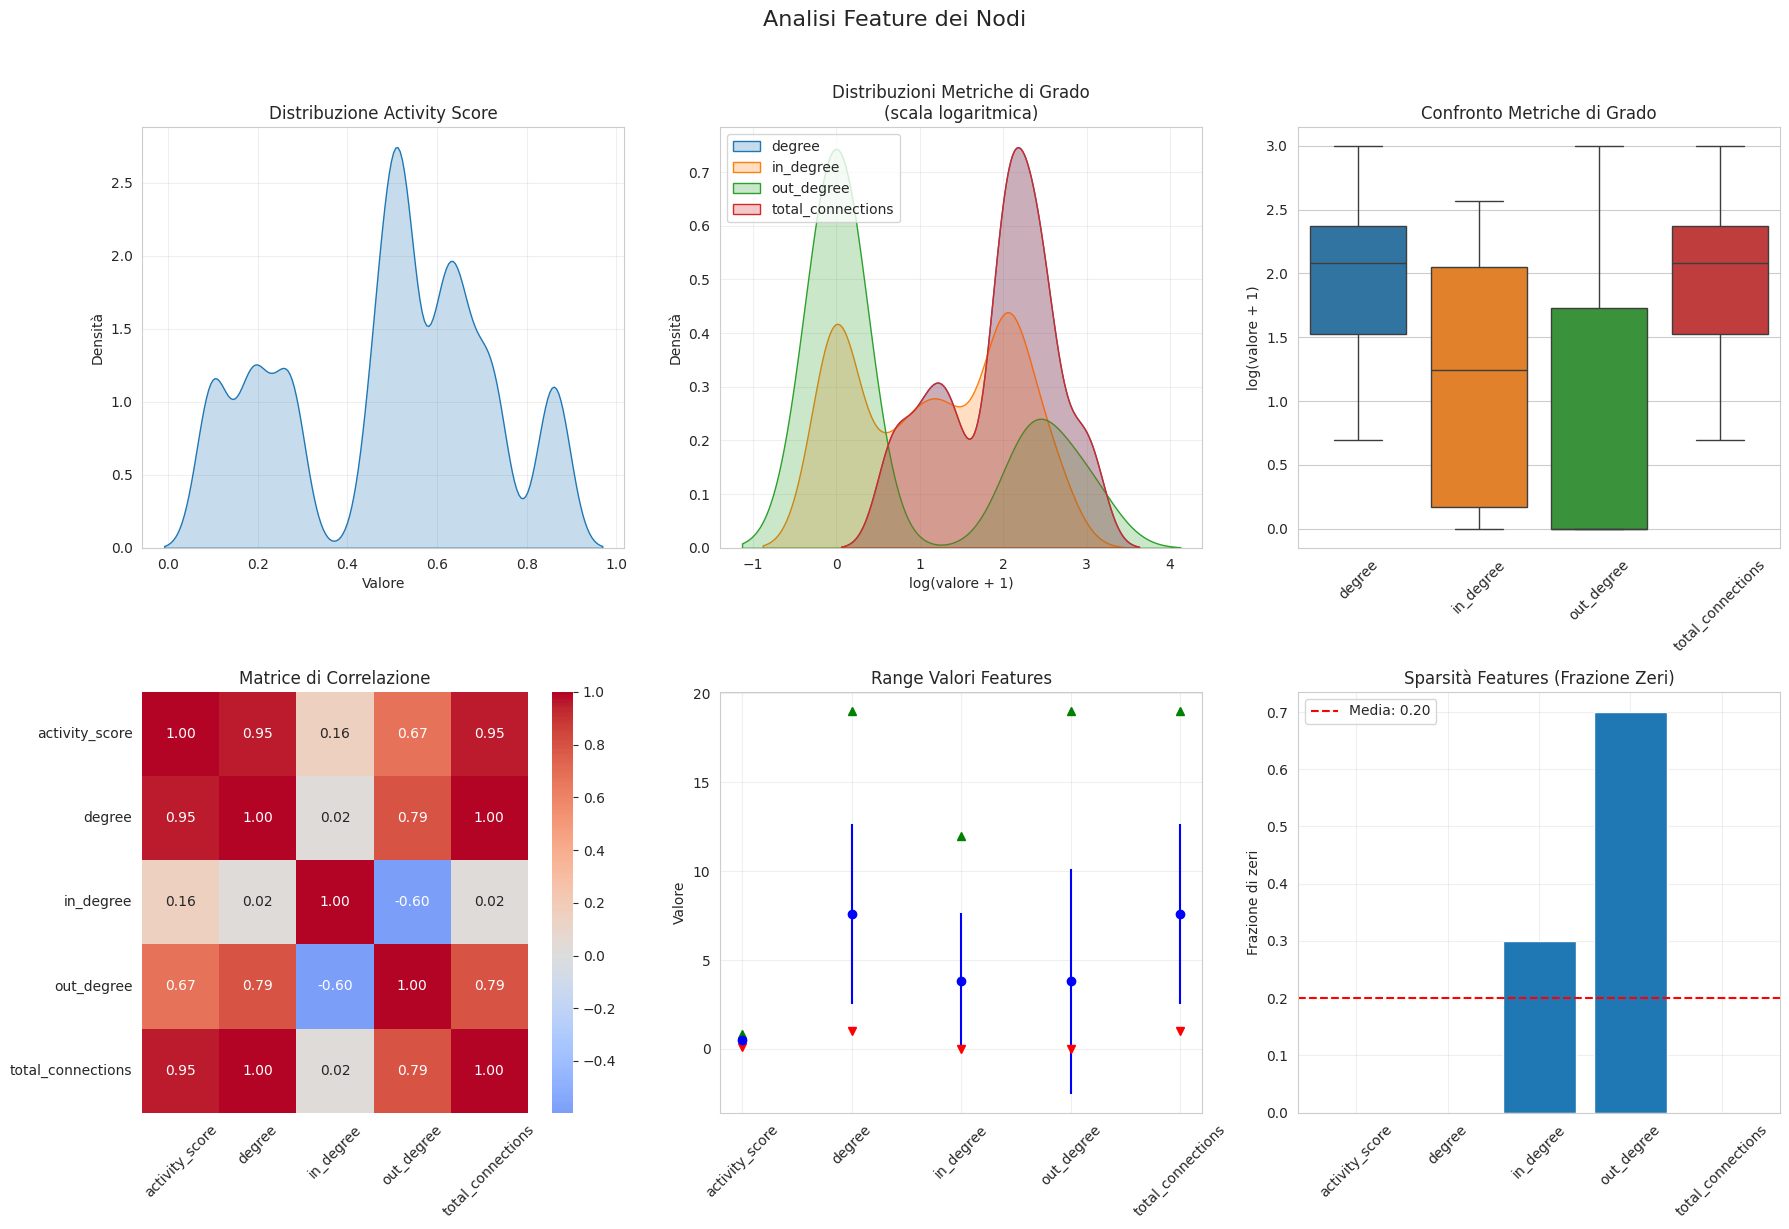


Analisi aggiuntiva:
- Le metriche di grado sono visualizzate in scala logaritmica
- Correlazione massima tra feature diverse: 1.00
- Correlazioni tra activity_score e metriche di grado:
  degree: 0.95
  in_degree: 0.16
  out_degree: 0.67
  total_connections: 0.95


In [11]:
visualize_node_features(data, feature_names= feature_names)

Grafo con 38 archi e 40 edge features:

Statistiche edge features:
- dst_port_type: {'name': 'dst_port_type', 'unique': 1, 'mean': np.float32(0.0), 'std': np.float32(0.0), 'min': np.float32(0.0), 'max': np.float32(0.0)}
- host_length: {'name': 'host_length', 'unique': 2, 'mean': np.float32(0.016052628), 'std': np.float32(0.0048879404), 'min': np.float32(0.01), 'max': np.float32(0.02)}
- http_version: {'name': 'http_version', 'unique': 1, 'mean': np.float32(1.0999998), 'std': np.float32(2.3841858e-07), 'min': np.float32(1.1), 'max': np.float32(1.1)}
- method_DELETE: {'name': 'method_DELETE', 'unique': 1, 'mean': np.float32(0.0), 'std': np.float32(0.0), 'min': np.float32(0.0), 'max': np.float32(0.0)}
- method_GET: {'name': 'method_GET', 'unique': 2, 'mean': np.float32(0.65789473), 'std': np.float32(0.47441462), 'min': np.float32(0.0), 'max': np.float32(1.0)}
- ua_Firefox: {'name': 'ua_Firefox', 'unique': 2, 'mean': np.float32(0.36842105), 'std': np.float32(0.4823763), 'min': np.float32(0

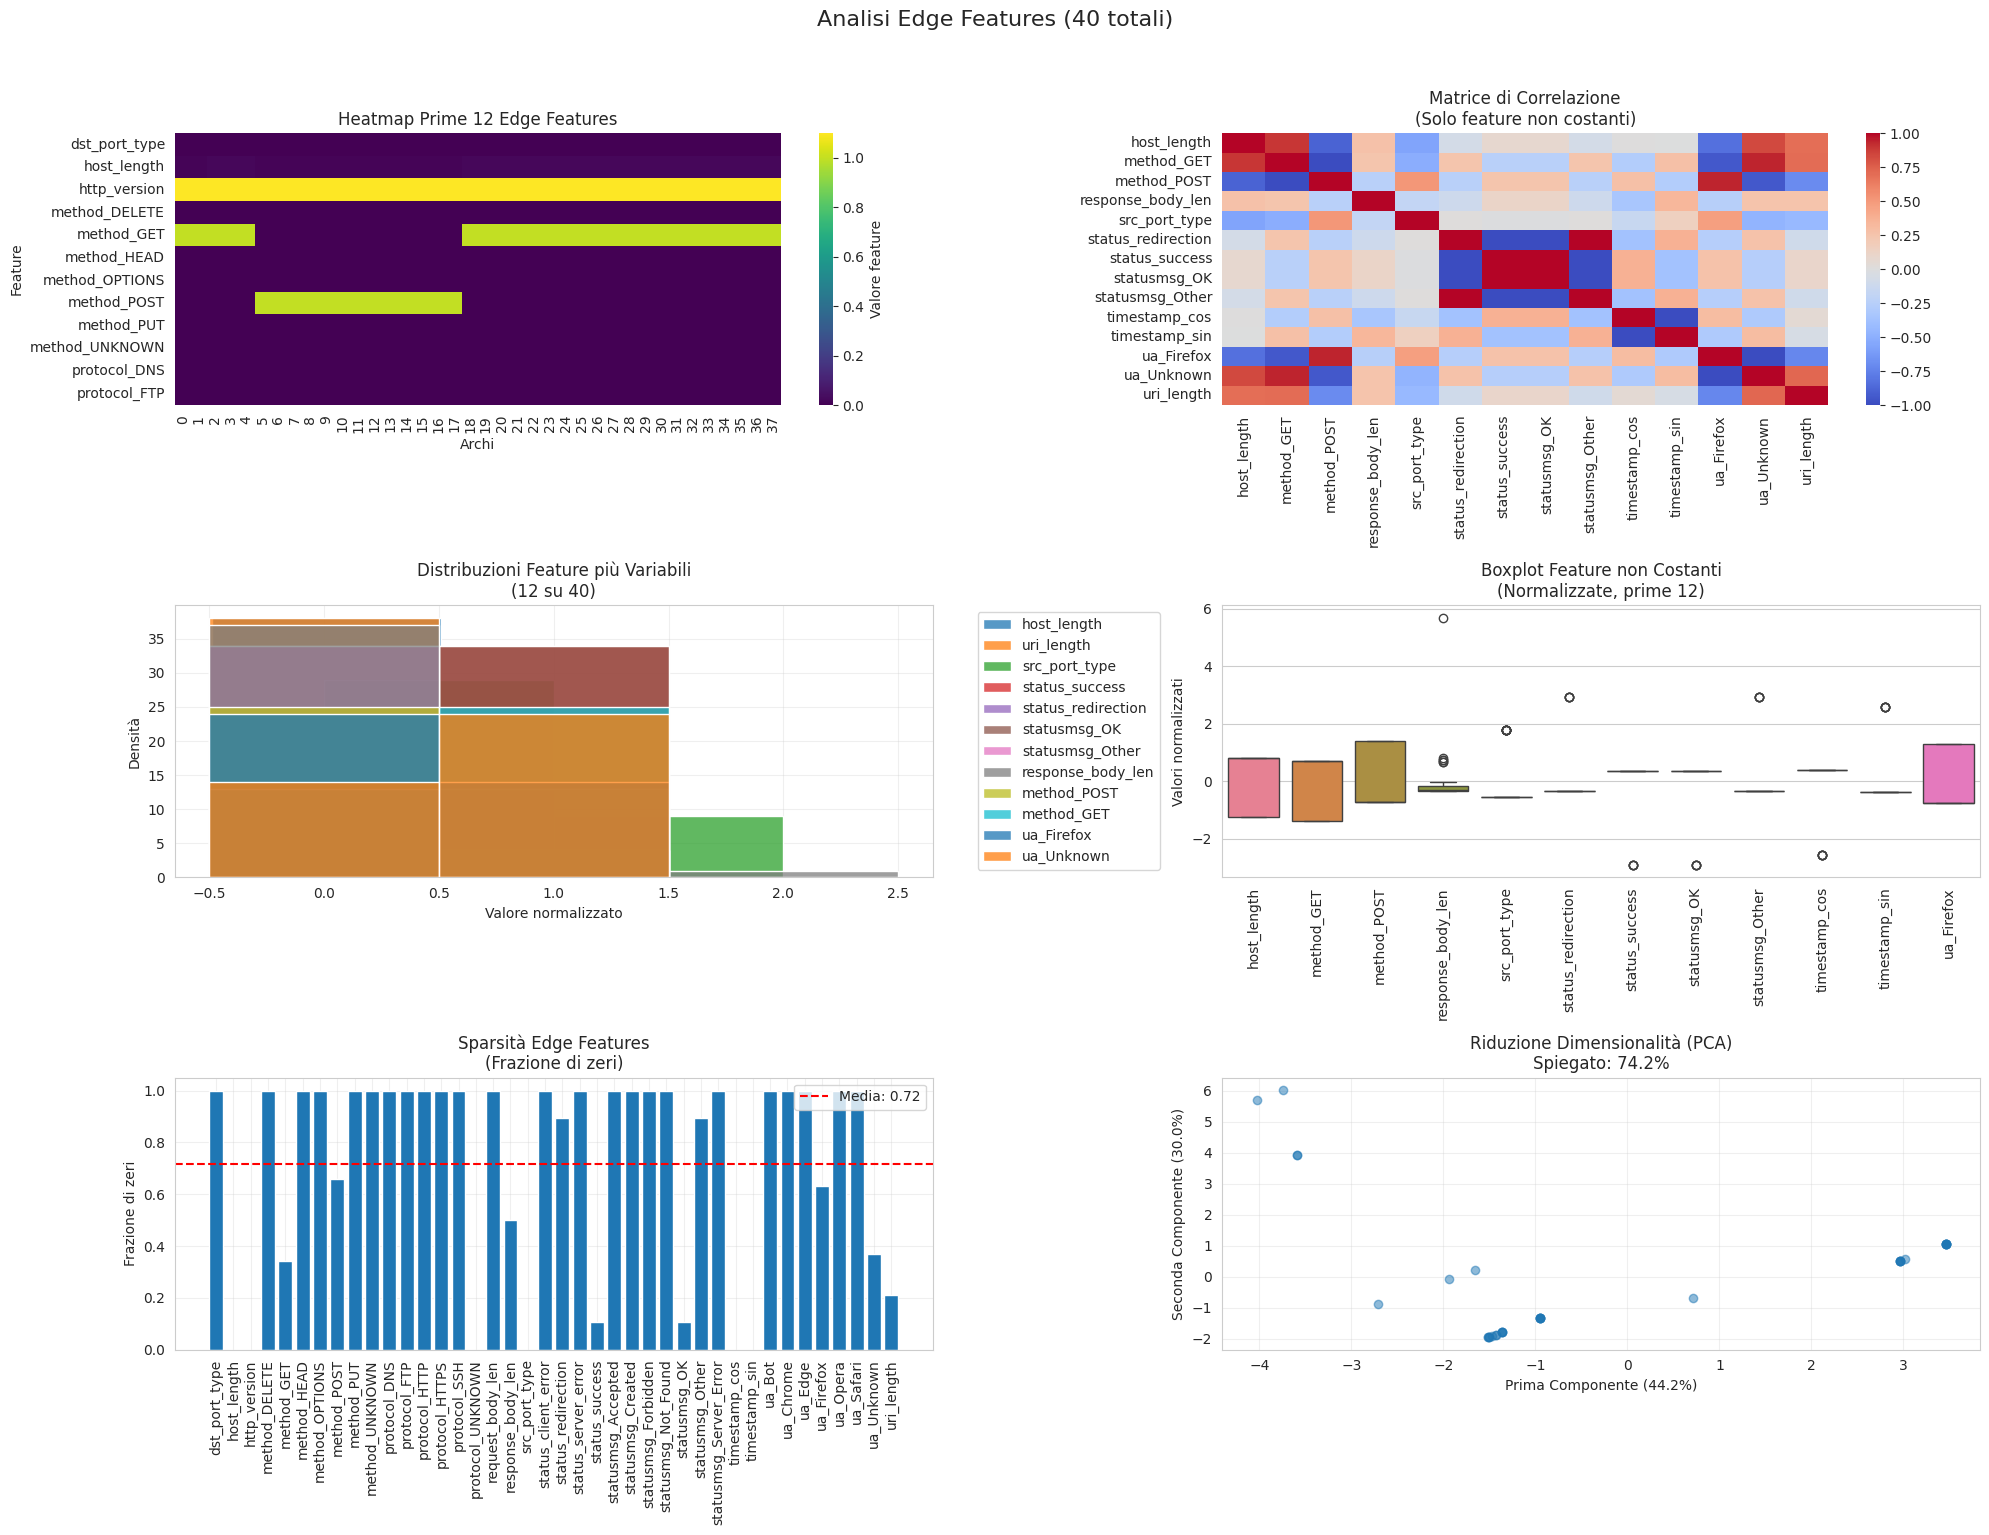


Analisi aggiuntiva:
- 26 feature sono costanti
- Massima correlazione tra feature diverse: 1.00
- Feature più correlate: method_GET e method_POST (1.00)


In [13]:
visualize_edge_features(data, edge_features_name)

In [14]:
updated_graph = update_nx_graph(updated_graph, "samples/update_encoded_2.dot")
data = nx_to_pyg(updated_graph, node_scaling='none', edge_scaling='none')

Updated node: 192.168.209.128
Updated node: 54.39.128.230
Updated node: 176.31.228.102
Updated node: 95.101.137.167
Updated node: 142.250.179.99
Updated node: 34.107.221.82
Updated node: 192.168.209.111
Updated node: 185.125.190.82
Updated node: 192.168.239.101
Updated node: 115.165.161.155
Added edge: 192.168.209.128 -> 54.39.128.230, key=0
Added edge: 192.168.209.128 -> 54.39.128.230, key=1
Added edge: 192.168.209.128 -> 176.31.228.102, key=0
Added edge: 192.168.209.128 -> 176.31.228.102, key=1
Added edge: 192.168.209.128 -> 176.31.228.102, key=2
Added edge: 192.168.209.128 -> 95.101.137.167, key=0
Added edge: 192.168.209.128 -> 95.101.137.167, key=1
Added edge: 192.168.209.128 -> 95.101.137.167, key=2
Added edge: 192.168.209.128 -> 95.101.137.167, key=3
Added edge: 192.168.209.128 -> 95.101.137.167, key=4
Added edge: 192.168.209.128 -> 95.101.137.167, key=5
Added edge: 192.168.209.128 -> 95.101.137.167, key=6
Added edge: 192.168.209.128 -> 142.250.179.99, key=0
Added edge: 192.168.2

Grafo con 10 nodi e 5 features:
Nomi features: activity_score, degree, in_degree, out_degree, total_connections

Statistiche features:
- activity_score: {'name': 'activity_score', 'unique': 7, 'mean': np.float32(0.807), 'std': np.float32(0.25068107), 'min': np.float32(0.27), 'max': np.float32(1.0)}
- degree: {'name': 'degree', 'unique': 10, 'mean': np.float32(491.6), 'std': np.float32(780.5206), 'min': np.float32(3.0), 'max': np.float32(2371.0)}
- in_degree: {'name': 'in_degree', 'unique': 9, 'mean': np.float32(245.8), 'std': np.float32(455.84094), 'min': np.float32(0.0), 'max': np.float32(1157.0)}
- out_degree: {'name': 'out_degree', 'unique': 4, 'mean': np.float32(245.8), 'std': np.float32(708.6077), 'min': np.float32(0.0), 'max': np.float32(2371.0)}
- total_connections: {'name': 'total_connections', 'unique': 10, 'mean': np.float32(491.6), 'std': np.float32(780.5206), 'min': np.float32(3.0), 'max': np.float32(2371.0)}


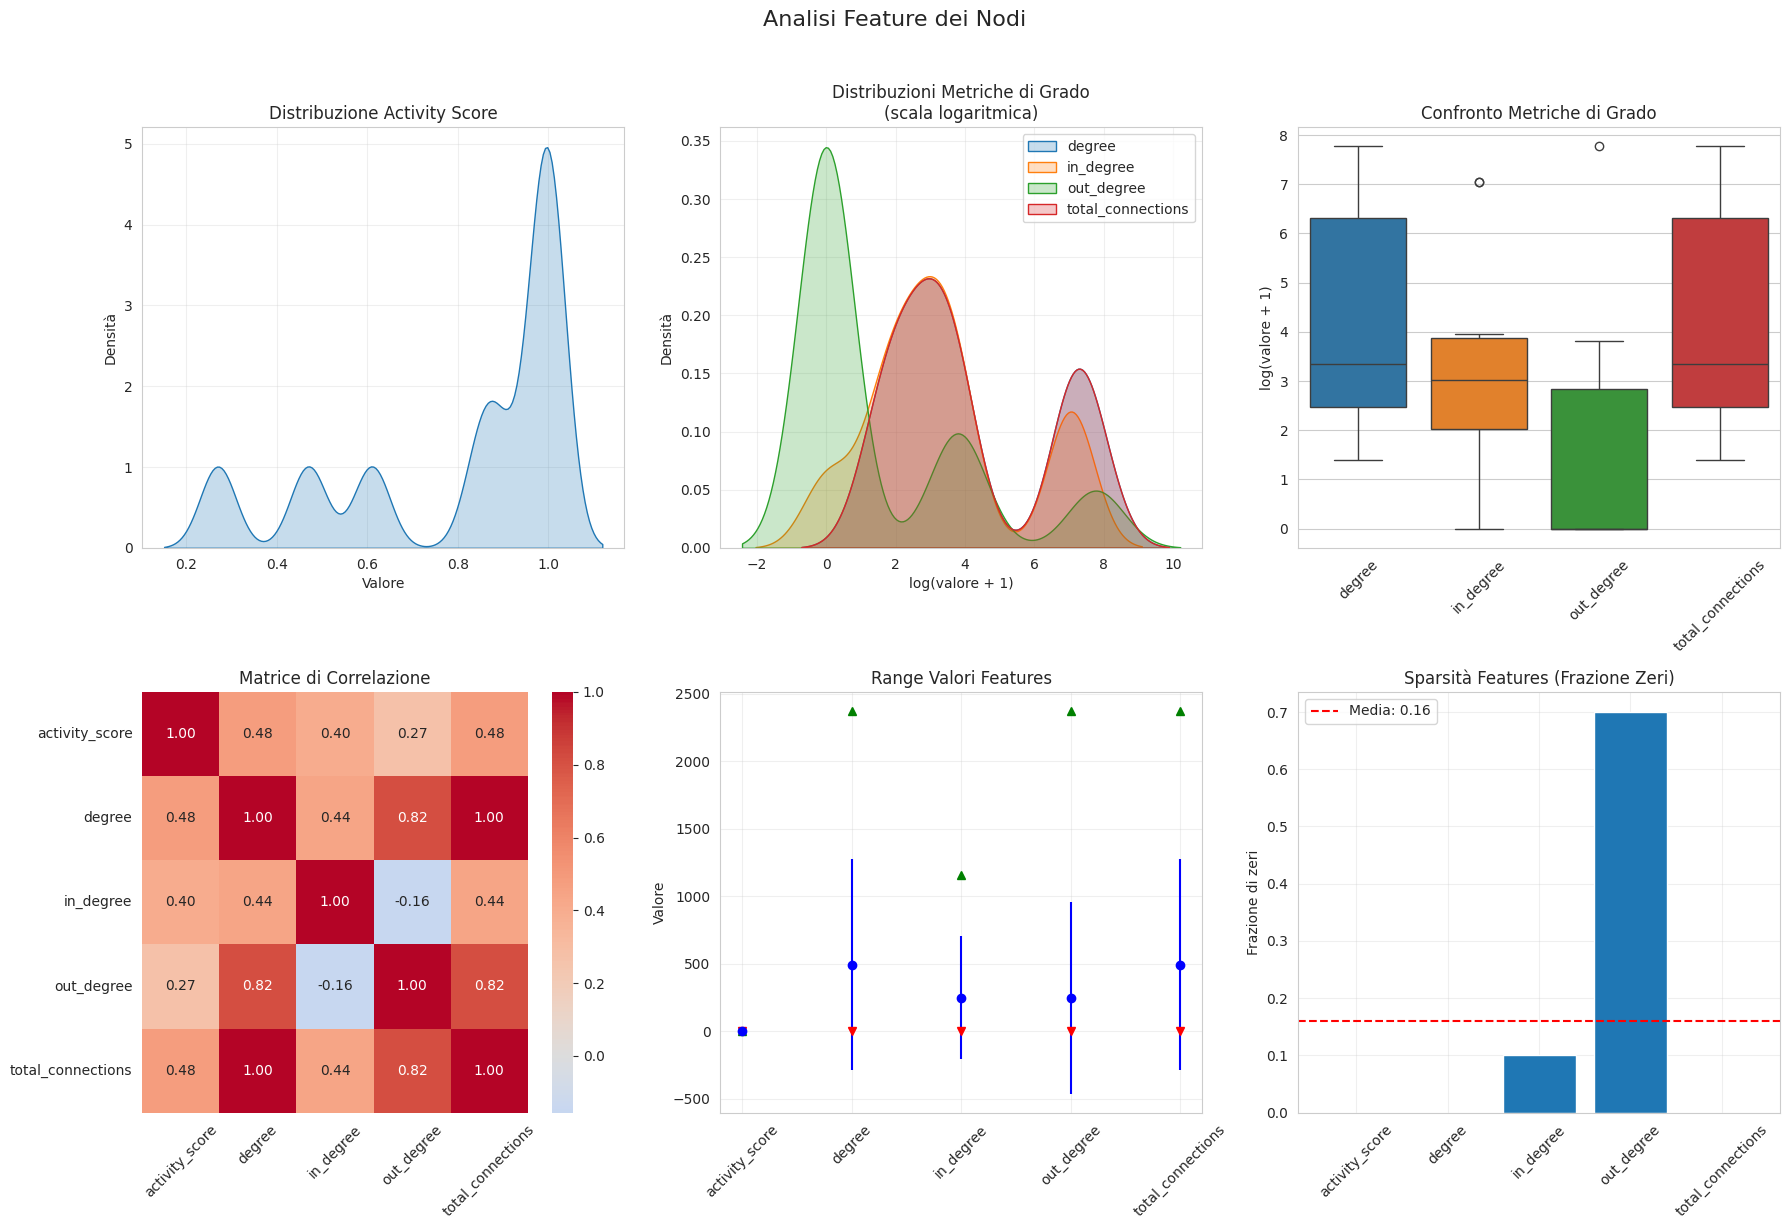


Analisi aggiuntiva:
- Le metriche di grado sono visualizzate in scala logaritmica
- Correlazione massima tra feature diverse: 1.00
- Correlazioni tra activity_score e metriche di grado:
  degree: 0.48
  in_degree: 0.40
  out_degree: 0.27
  total_connections: 0.48


In [15]:
visualize_node_features(data, feature_names= feature_names)

Grafo con 1885 archi e 40 edge features:

Statistiche edge features:
- dst_port_type: {'name': 'dst_port_type', 'unique': 1, 'mean': np.float32(0.0), 'std': np.float32(0.0), 'min': np.float32(0.0), 'max': np.float32(0.0)}
- host_length: {'name': 'host_length', 'unique': 2, 'mean': np.float32(0.010201589), 'std': np.float32(0.0014054452), 'min': np.float32(0.01), 'max': np.float32(0.02)}
- http_version: {'name': 'http_version', 'unique': 1, 'mean': np.float32(1.1000001), 'std': np.float32(1.1920929e-07), 'min': np.float32(1.1), 'max': np.float32(1.1)}
- method_DELETE: {'name': 'method_DELETE', 'unique': 1, 'mean': np.float32(0.0), 'std': np.float32(0.0), 'min': np.float32(0.0), 'max': np.float32(0.0)}
- method_GET: {'name': 'method_GET', 'unique': 2, 'mean': np.float32(0.99310344), 'std': np.float32(0.08275862), 'min': np.float32(0.0), 'max': np.float32(1.0)}
- ua_Firefox: {'name': 'ua_Firefox', 'unique': 2, 'mean': np.float32(0.9750663), 'std': np.float32(0.15592305), 'min': np.float32

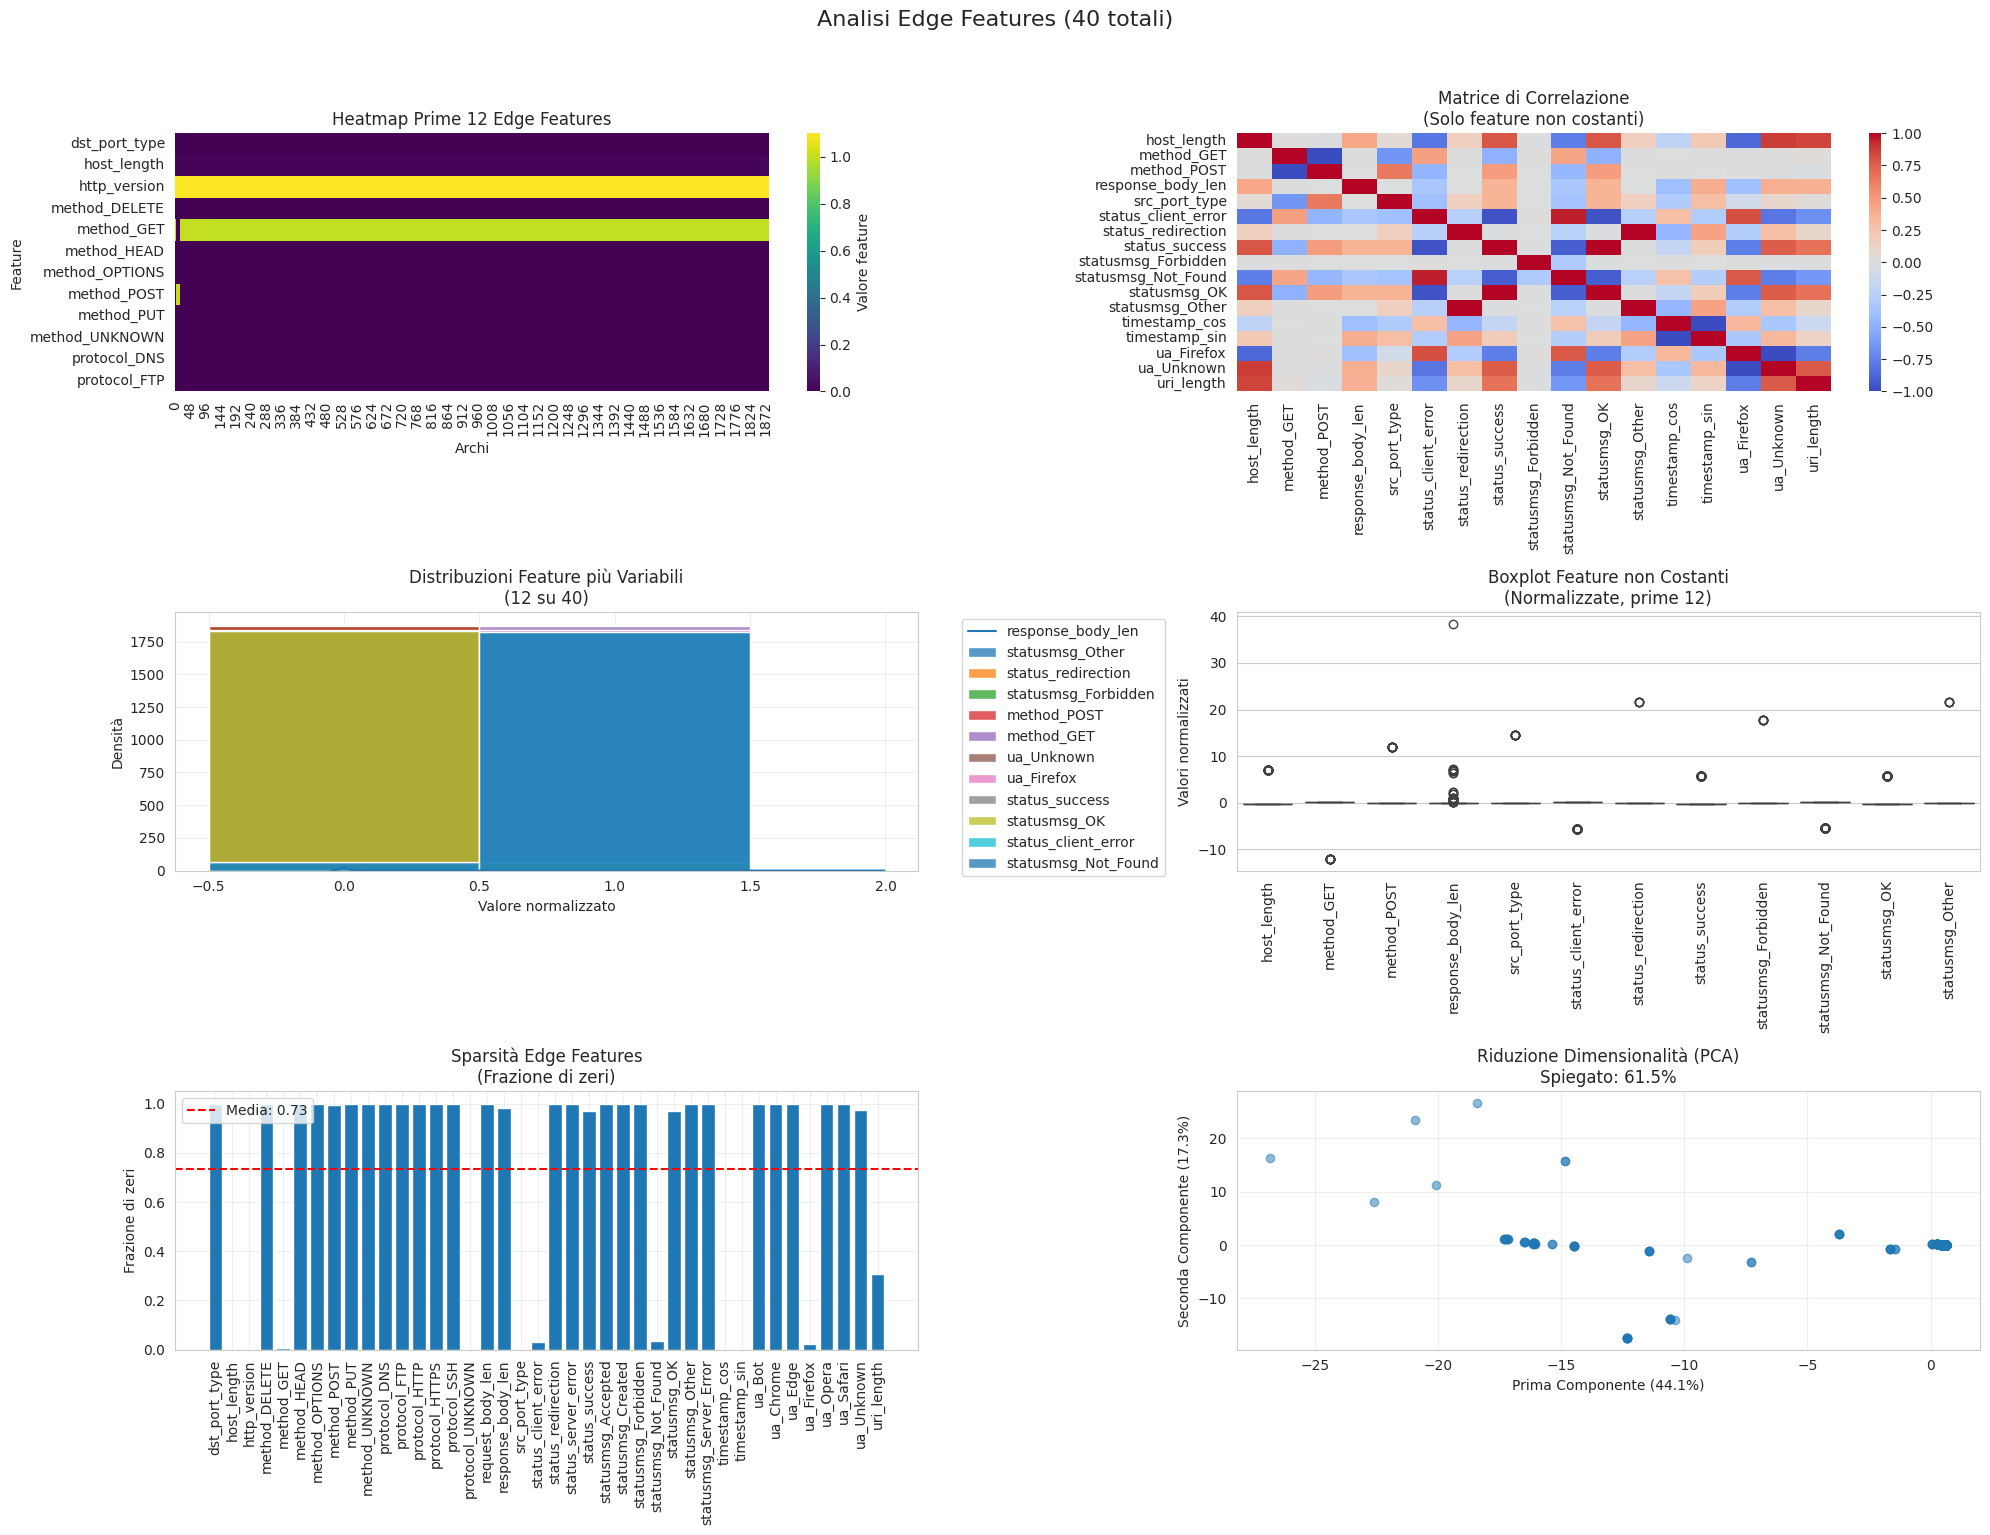


Analisi aggiuntiva:
- 23 feature sono costanti
- Massima correlazione tra feature diverse: 1.00
- Feature più correlate: method_GET e method_POST (1.00)


In [16]:
visualize_edge_features(data, edge_features_name)

# Automating

## Methods

In [7]:
import os
import time
from datetime import datetime

def extract_timestamp_from_epoch(filename):
    """
    Extracts a datetime object from a filename assuming the filename (or part of it)
    contains a Unix epoch timestamp (in seconds).

    Args:
        filename (str): The name of the file.

    Returns:
        datetime or None: The extracted datetime object, or None if no match is found
                         or if the extracted value is not a valid integer.
    """
    # Example patterns: adjust as needed to match how the epoch is in your filenames
    pattern = r"_(\d+)\."         # Matches digits between an underscore and a dot (e.g., file_1678886400.txt)

    match = re.search(pattern, filename)
    if match:
        try:
            epoch_seconds = int(match.group(1))
            return datetime.fromtimestamp(epoch_seconds)
        except ValueError:
            return None
    return None

def process_file(filepath, main_graph, main_data):
    """Processes a single file, parses graph updates, and updates the main graph."""
    print(f"Processing file: {filepath}")
    if main_graph is None:
        initial_graph = dot_to_nx(filepath)
        pytorch_data = nx_to_pyg(initial_graph, node_scaling='standard', edge_scaling='none')
        return initial_graph, pytorch_data
    else:
        updated_graph = update_nx_graph(main_graph, filepath)
        pytorch_data = nx_to_pyg(updated_graph, node_scaling='standard', edge_scaling='none')
        return updated_graph, pytorch_data


def process_and_learn(directory, update_interval_seconds=60):
    """
    Monitors the directory for files, processes them, updates the graph,
    and triggers graph updates at a fixed interval.
    """
    processed_files = set()
    main_graph = None
    main_data = None
    last_update_time = time.time()

    while True:
        all_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
        files_with_timestamps = []

        for filename in all_files:
            timestamp_dt = extract_timestamp_from_epoch(filename)
            if timestamp_dt:
                files_with_timestamps.append((timestamp_dt, os.path.join(directory, filename), filename))

        files_with_timestamps.sort(key=lambda item: item[0])

        for timestamp_dt, filepath, filename in files_with_timestamps:
            if filename not in processed_files:
                print(f"Found new file: {filename} (Timestamp: {timestamp_dt})")
                main_graph, main_data = process_file(filepath, main_graph, main_data)
                print("\nPyTorch Geometric Data Object:")
                print(main_graph)
                processed_files.add(filename)

        current_time = time.time()
        if current_time - last_update_time >= update_interval_seconds:
            print(f"Triggering graph update at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
            # Here you would perform the action that constitutes a "graph update"
            # based on the current state of `main_graph`.
            # This might involve:
            # 1. Preparing the graph data for GNN training.
            # 2. Triggering a GNN training or fine-tuning step.
            # 3. Saving the current graph state.
            # 4. Performing some analysis on the graph.
            visualize_node_features(main_data, feature_names=['activity_score', 'degree', 'in_degree', 'out_degree', 'total_connections'])
            visualize_edge_features(main_data, edge_feature_names=['conn_state_other', 'conn_state_partial', 'conn_state_rejected_reset', 'conn_state_successful', 'conn_state_suspicious', 'dst_port_type', 'history_length', 'local_orig', 'local_resp', 'orig_bytes', 'orig_ip_bytes', 'orig_pkts', 'protocol_ICMP', 'protocol_TCP', 'protocol_UDP', 'protocol_UNKNOWN', 'resp_bytes', 'resp_ip_bytes', 'resp_pkts', 'service_DNS', 'service_FTP', 'service_HTTP', 'service_SSH', 'service_UNKNOWN', 'src_port_type', 'timestamp_cos', 'timestamp_sin'])


            last_update_time = current_time

        print(f"Monitoring for new files in '{directory}'... (Last check: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        time.sleep(5) # Check for new files relatively frequently


## Workflow

Starting to monitor directory: samples/big_web_enum
Found new file: nw_graph_encoded_1747729708.dot (Timestamp: 2025-05-20 10:28:28)
Processing file: samples/big_web_enum/nw_graph_encoded_1747729708.dot
Sorted node attribute keys: ['activity_score', 'degree', 'in_degree', 'out_degree', 'total_connections']
Node Features (x) after initial standard scaling: tensor([[ 0.,  0., -1.,  1.,  0.],
        [ 0.,  0.,  1., -1.,  0.]])
Sorted edge attribute keys: ['conn_state_other', 'conn_state_partial', 'conn_state_rejected_reset', 'conn_state_successful', 'conn_state_suspicious', 'dst_port_type', 'history_length', 'local_orig', 'local_resp', 'orig_bytes', 'orig_ip_bytes', 'orig_pkts', 'protocol_ICMP', 'protocol_TCP', 'protocol_UDP', 'protocol_UNKNOWN', 'resp_bytes', 'resp_ip_bytes', 'resp_pkts', 'service_DNS', 'service_FTP', 'service_HTTP', 'service_SSH', 'service_UNKNOWN', 'src_port_type', 'timestamp_cos', 'timestamp_sin']
No edge feature scaling applied.

PyTorch Geometric Data Object:
Multi

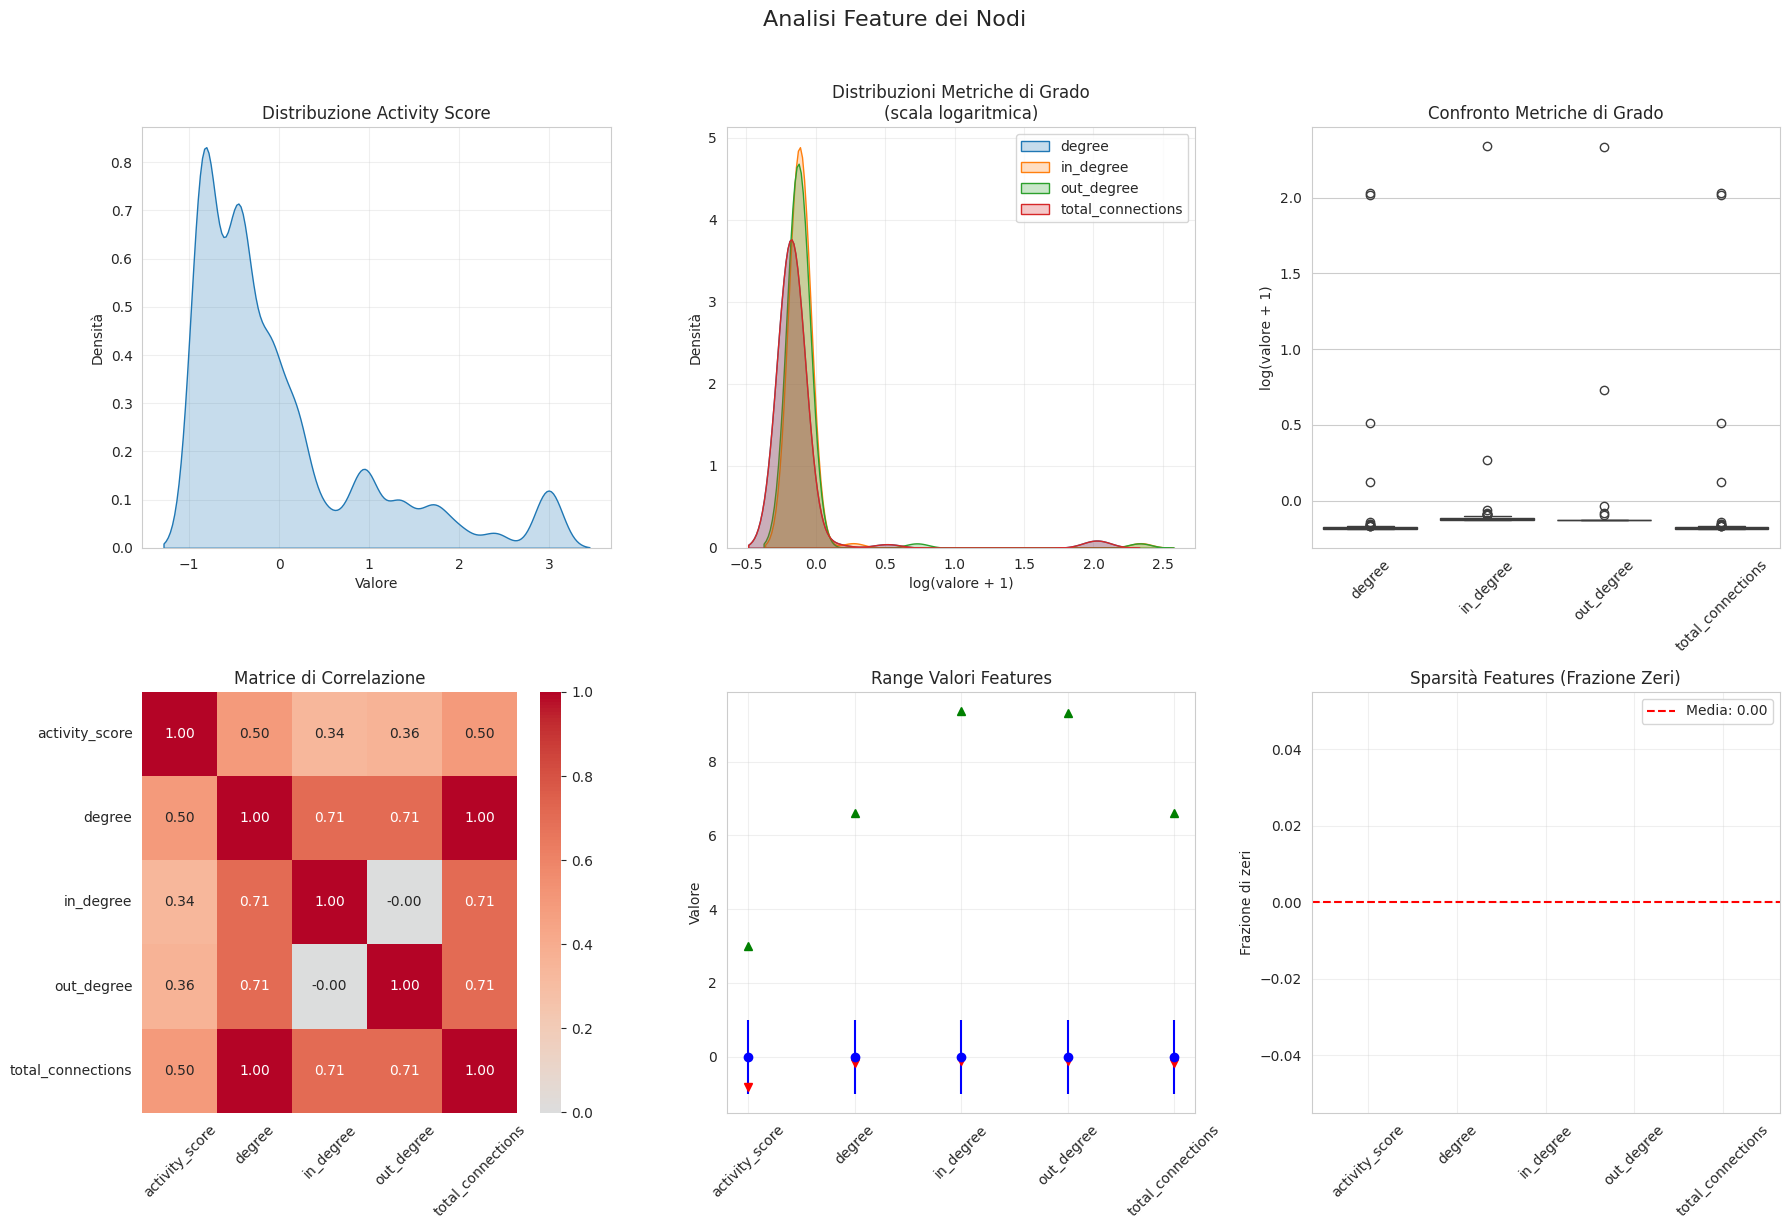


Analisi aggiuntiva:
- Le metriche di grado sono visualizzate in scala logaritmica
- Correlazione massima tra feature diverse: 1.00
- Correlazioni tra activity_score e metriche di grado:
  degree: 0.50
  in_degree: 0.34
  out_degree: 0.36
  total_connections: 0.50
Grafo con 1234 archi e 27 edge features:

Statistiche edge features:
- conn_state_other: {'name': 'conn_state_other', 'unique': 2, 'mean': np.float32(0.012965964), 'std': np.float32(0.113127574), 'min': np.float32(0.0), 'max': np.float32(1.0)}
- conn_state_partial: {'name': 'conn_state_partial', 'unique': 2, 'mean': np.float32(0.00081037276), 'std': np.float32(0.02845551), 'min': np.float32(0.0), 'max': np.float32(1.0)}
- conn_state_rejected_reset: {'name': 'conn_state_rejected_reset', 'unique': 2, 'mean': np.float32(0.8030794), 'std': np.float32(0.39767182), 'min': np.float32(0.0), 'max': np.float32(1.0)}
- conn_state_successful: {'name': 'conn_state_successful', 'unique': 2, 'mean': np.float32(0.1815235), 'std': np.float32(

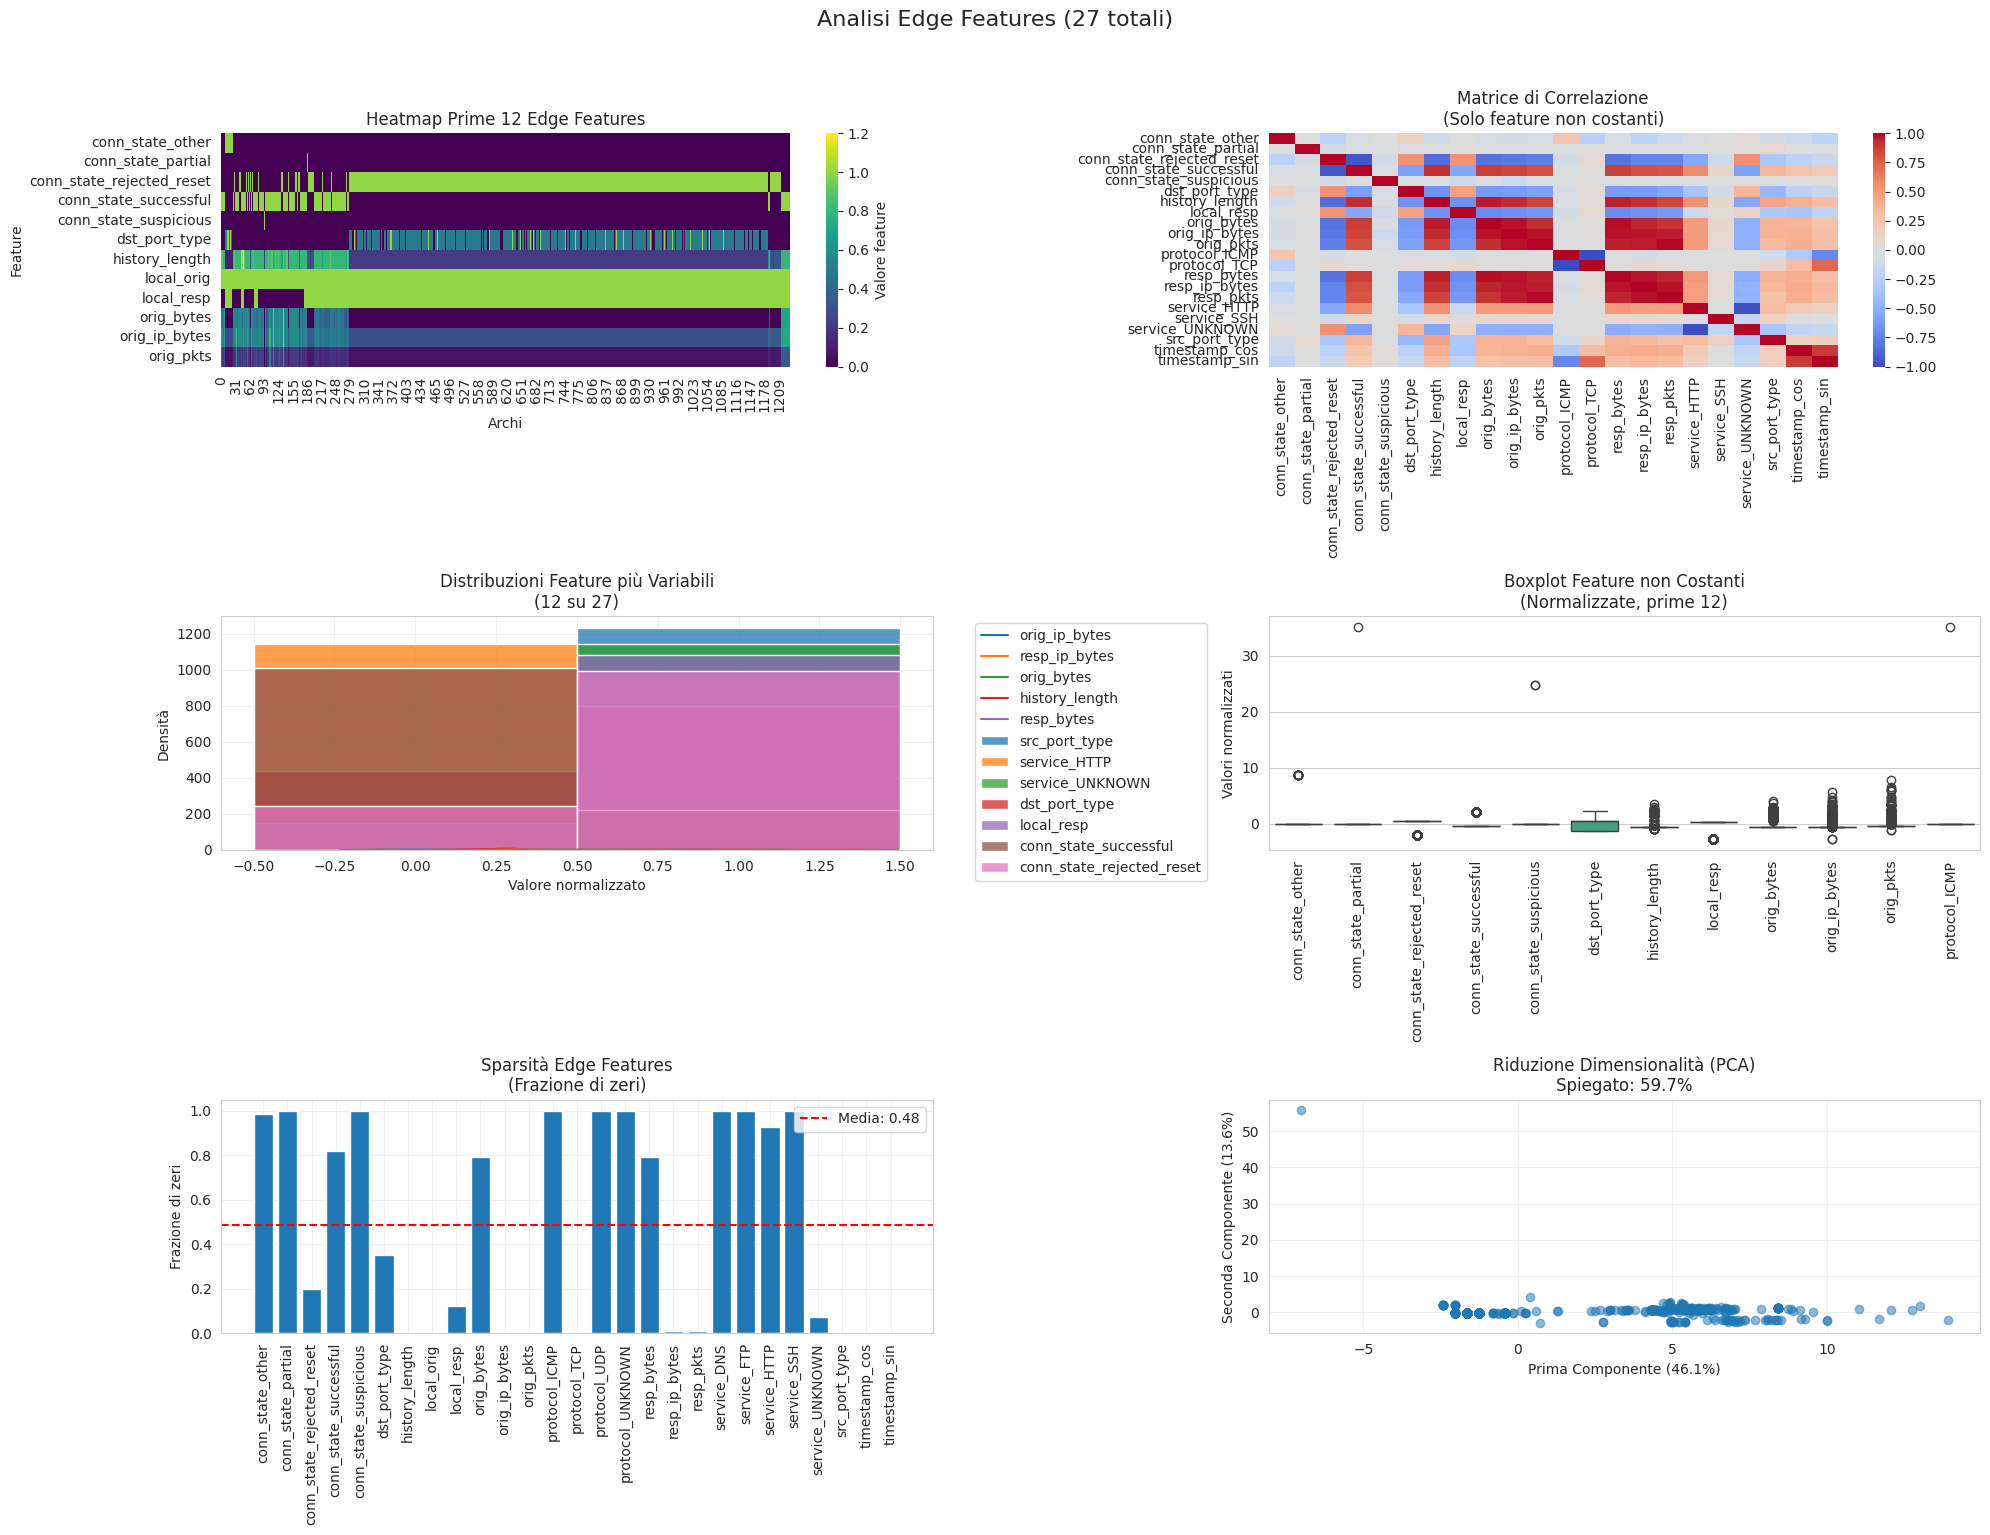


Analisi aggiuntiva:
- 5 feature sono costanti
- Massima correlazione tra feature diverse: 1.00
- Feature più correlate: protocol_ICMP e protocol_TCP (1.00)
Monitoring for new files in 'samples/big_web_enum'... (Last check: 2025-05-21 16:11:02
Monitoring for new files in 'samples/big_web_enum'... (Last check: 2025-05-21 16:11:07
Monitoring for new files in 'samples/big_web_enum'... (Last check: 2025-05-21 16:11:12
Monitoring for new files in 'samples/big_web_enum'... (Last check: 2025-05-21 16:11:17
Monitoring for new files in 'samples/big_web_enum'... (Last check: 2025-05-21 16:11:22


KeyboardInterrupt: 

In [8]:
target_directory = "samples/big_web_enum"  # Encoded graph path

if not os.path.isdir(target_directory):
    print(f"Error: Directory '{target_directory}' does not exist.")
else:
    print(f"Starting to monitor directory: {target_directory}")
    process_and_learn(target_directory)

# GNN STUFF

In [4]:
from neural_net import (
    HybridGNNAnomalyDetector
)

In [5]:
def process_and_learn(directory, update_interval_seconds=60):
    """
    Monitors the directory for files, processes them, updates the graph,
    and triggers online learning at fixed intervals.
    """
    processed_files = set()
    main_graph = None
    main_data = None
    last_update_time = time.time()
    gnn_model = None

    # Training parameters
    initial_training_epochs = 10  # Only for first training
    online_update_steps = 5       # For subsequent updates

    while True:
        # Check for new files
        all_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
        files_with_timestamps = []

        for filename in all_files:
            timestamp_dt = extract_timestamp_from_epoch(filename)
            if timestamp_dt:
                files_with_timestamps.append((timestamp_dt, os.path.join(directory, filename), filename))

        files_with_timestamps.sort(key=lambda item: item[0])

        # Process new files
        for timestamp_dt, filepath, filename in files_with_timestamps:
            if filename not in processed_files:
                print(f"Found new file: {filename} (Timestamp: {timestamp_dt})")
                main_graph, main_data = process_file(filepath, main_graph, main_data)
                processed_files.add(filename)

        # Periodic graph update and learning
        current_time = time.time()
        if current_time - last_update_time >= update_interval_seconds:
            print(f"\n--- Graph Update Cycle at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')} ---")

            if main_data is not None:
                # Initialize model if needed
                if gnn_model is None:
                    node_feature_dim = main_data.x.size(1)
                    edge_feature_dim = main_data.edge_attr.size(1)
                    gnn_model = HybridGNNAnomalyDetector(node_feature_dim, edge_feature_dim)
                    print(f"Initialized Hybrid GNN (node_dim={node_feature_dim}, edge_dim={edge_feature_dim})")

                    # Initial training
                    print("Performing initial training...")
                    for epoch in range(initial_training_epochs):
                        loss = gnn_model.update_online(main_data, n_steps=5)
                        print(f"Epoch {epoch+1}/{initial_training_epochs}, Loss: {loss:.4f}")
                else:
                    # Online update
                    print("Performing online update...")
                    loss = gnn_model.update_online(main_data, n_steps=online_update_steps)
                    print(f"Online update complete. Loss: {loss:.4f}")

                # Detect and report anomalies
                print("\nRunning anomaly detection...")
                anomalies = gnn_model.detect_anomalies(main_data)

                # Report results
                print(f"\nGlobal anomaly score: {anomalies['global_anomaly']:.4f}")

                # Node anomalies
                if len(anomalies['node_anomalies']) > 0:
                    print(f"\nDetected {len(anomalies['node_anomalies'])} anomalous nodes:")
                    for idx in anomalies['node_anomalies'][:5]:  # Show top 5
                        print(f"  Node {idx}: score={anomalies['node_scores'][idx]:.4f}")
                else:
                    print("\nNo significant node anomalies detected")

                # Edge anomalies
                if len(anomalies['edge_anomalies']) > 0:
                    print(f"\nDetected {len(anomalies['edge_anomalies'])} anomalous edges:")
                    for idx in anomalies['edge_anomalies'][:5]:  # Show top 5
                        src = main_data.edge_index[0][idx].item()
                        dst = main_data.edge_index[1][idx].item()
                        print(f"  Edge {src}->{dst}: score={anomalies['edge_scores'][idx]:.4f}")
                else:
                    print("\nNo significant edge anomalies detected")

                # Visualization (optional)
                if len(processed_files) % 5 == 0:  # Visualize every 5 updates
                    visualize_node_features(main_data)
                    visualize_edge_features(main_data)

            last_update_time = current_time

        # Wait before next check
        sleep_time = min(5, update_interval_seconds/2)  # Check frequently but not too fast
        time.sleep(sleep_time)

# Workflow with GNN

In [ ]:
target_directory = "samples/big_web_enum"  # Encoded graph path

if not os.path.isdir(target_directory):
    print(f"Error: Directory '{target_directory}' does not exist.")
else:
    print(f"Starting to monitor directory: {target_directory}")
    process_and_learn(target_directory)

Starting to monitor directory: samples/big_web_enum
Found new file: nw_graph_encoded_1747729708.dot (Timestamp: 2025-05-20 10:28:28)
Processing file: samples/big_web_enum/nw_graph_encoded_1747729708.dot
Sorted node attribute keys: ['activity_score', 'degree', 'in_degree', 'out_degree', 'total_connections']
Node Features (x) after initial standard scaling: tensor([[ 0.,  0., -1.,  1.,  0.],
        [ 0.,  0.,  1., -1.,  0.]])
Sorted edge attribute keys: ['conn_state_other', 'conn_state_partial', 'conn_state_rejected_reset', 'conn_state_successful', 'conn_state_suspicious', 'dst_port_type', 'history_length', 'local_orig', 'local_resp', 'orig_bytes', 'orig_ip_bytes', 'orig_pkts', 'protocol_ICMP', 'protocol_TCP', 'protocol_UDP', 'protocol_UNKNOWN', 'resp_bytes', 'resp_ip_bytes', 'resp_pkts', 'service_DNS', 'service_FTP', 'service_HTTP', 'service_SSH', 'service_UNKNOWN', 'src_port_type', 'timestamp_cos', 'timestamp_sin']
No edge feature scaling applied.
Found new file: nw_graph_encoded_1747